In [2]:
import astropy.io.fits as fits
import numpy as np
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import deep_filaments.io.utils as utils
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

# Data visualisation

In [2]:
input_data = fits.getdata("/home/loris/PhD/Dev/Code/data_exploration/data/SEDIGISM/16/COHRS_15p50-16p50_3D.fits")
data = np.zeros((input_data.shape[1] * input_data.shape[2], input_data.shape[0]))
for i in range(input_data.shape[0]):
    for j in range(input_data.shape[1]):
        for k in range(input_data.shape[2]):
            data[j + k * input_data.shape[1], i] = input_data[i,j,k]
spine_data = fits.getdata("/home/loris/PhD/Dev/Code/data_exploration/data/SEDIGISM/16/COHRS_15p50-16p50_2D_UNet_binarize_0.01_resized.fits")
labels = np.zeros((spine_data.shape[0] * spine_data.shape[1])).astype(np.float32)
for j in range(spine_data.shape[0]):
        for k in range(spine_data.shape[1]):
            labels[j + k * spine_data.shape[0]] = spine_data[j,k]

In [15]:
alpha = 3 / np.max(data)
data = np.tanh(alpha * data) / alpha

0.1085827183635052


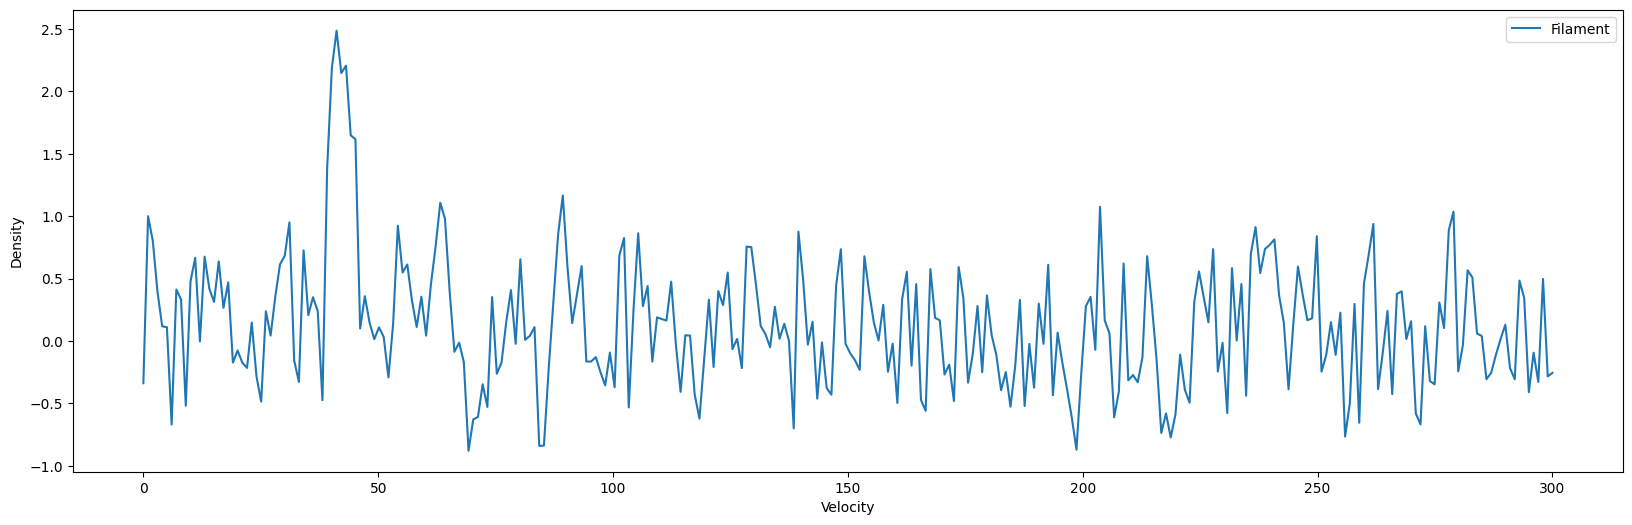

In [6]:
plt.figure(figsize=(20,6))
row = 512
column = 455
size = 300
plt.plot(np.linspace(0, size, size), data[row + column * input_data.shape[1]][300:300 + size], label="Filament")
plt.xlabel("Velocity")
plt.ylabel("Density")
plt.legend()
plt.show()

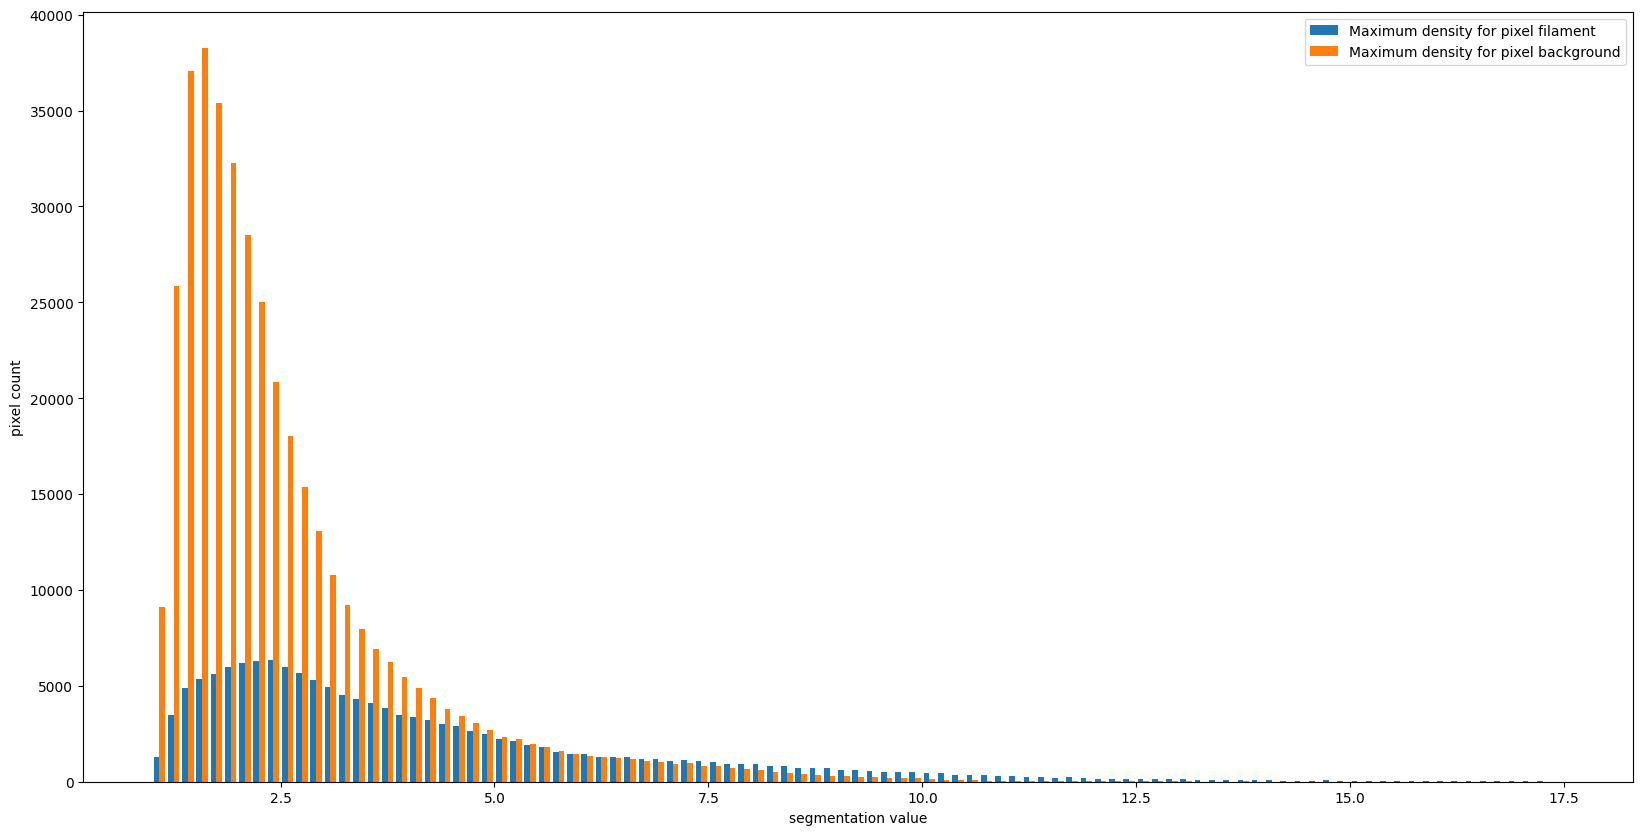

: 

In [21]:
plt.figure(figsize=(20,10))
background_pixels = data[labels == 0]
filament_pixels = data[labels == 1]
plt.hist([np.max(filament_pixels, axis=1), np.max(background_pixels, axis=1)], bins=np.linspace(1,17.5,100), label=["Maximum density for pixel filament", "Maximum density for pixel background"])
plt.xlabel("segmentation value")
plt.ylabel("pixel count")
plt.legend()
plt.show()

# Cluster

## CORHS Cluster

In [3]:
files_dir = "/home/loris/PhD/Dev/Datasets/COHRS/3D_Cluster_1/"
files = utils.get_sorted_file_list(files_dir)
image_shape = []
headers_files = utils.get_sorted_file_list("/home/loris/PhD/Dev/Datasets/COHRS/2D_Cluster_1/")
headers = [fits.getheader("/home/loris/PhD/Dev/Datasets/COHRS/2D_Cluster_1/" + header) for header in headers_files]
pixels = None
for file in files:
    print(file)
    input_data = fits.open(files_dir + file)[0].data[250:450,:,:]
    image_shape.append([input_data.shape[1], input_data.shape[2]])
    data = np.zeros((input_data.shape[1] * input_data.shape[2], input_data.shape[0]))
    for i in range(input_data.shape[0]):
        for j in range(input_data.shape[1]):
            for k in range(input_data.shape[2]):
                data[j + k * input_data.shape[1], i] = input_data[i,j,k]
    if pixels is None:
        pixels = data
    else:
        pixels = np.concatenate((pixels, data))

# pixels -= np.min(pixels)
# pixels /= np.max(pixels)

cluster_list = np.linspace(2, 10, 9)
kmeans_list = [KMeans(n_clusters=n,max_iter=5000) for n in range(2,10)]
pca = PCA()
transformed_data = pca.fit_transform(pixels)
for n in cluster_list:
    print(n)
    labels = kmeans_list[n].fit_predict(transformed_data)
    count = 0
    for k in range(len(image_shape)):
        tmp = labels[count : image_shape[0] * image_shape[1]]
        count += image_shape[0] * image_shape[1]
        segmentation = np.zeros((image_shape[k][0], image_shape[k][0]))
        for i in range(segmentation.shape[0]):
            for j in range(segmentation.shape[1]):
                segmentation[i, j] = labels[i + j * segmentation.shape[0]]
        fits.writeto(f"/home/loris/PhD/Dev/Datasets/COHRS/Clustering/{n}_clusters/" + f"{n}_Clusters_" + files[i], data=segmentation, header=headers[k], overwrite=True)

COHRS_09p50_0p00_CUBE_3T2_R2.fit
COHRS_10p50_0p00_CUBE_3T2_R2.fit
COHRS_11p50_0p00_CUBE_3T2_R2.fit
COHRS_12p50_0p00_CUBE_3T2_R2.fit
COHRS_13p50_0p00_CUBE_3T2_R2.fit
COHRS_14p50_0p00_CUBE_3T2_R2.fit
COHRS_15p50_0p00_CUBE_3T2_R2.fit
COHRS_16p50_0p00_CUBE_3T2_R2.fit
COHRS_17p50_0p00_CUBE_3T2_R2.fit
COHRS_18p50_0p00_CUBE_3T2_R2.fit
COHRS_19p50_0p00_CUBE_3T2_R2.fit
COHRS_20p50_0p00_CUBE_3T2_R2.fit
COHRS_21p50_0p00_CUBE_3T2_R2.fit
COHRS_22p50_0p00_CUBE_3T2_R2.fit
COHRS_23p50_0p00_CUBE_3T2_R2.fit
COHRS_24p50_0p00_CUBE_3T2_R2.fit
COHRS_25p50_0p00_CUBE_3T2_R2.fit
COHRS_26p50_0p00_CUBE_3T2_R2.fit
COHRS_27p50_0p00_CUBE_3T2_R2.fit
COHRS_28p50_0p00_CUBE_3T2_R2.fit
COHRS_29p50_0p00_CUBE_3T2_R2.fit
COHRS_30p50_0p00_CUBE_3T2_R2.fit
COHRS_31p50_0p00_CUBE_3T2_R2.fit
COHRS_32p50_0p00_CUBE_3T2_R2.fit
COHRS_33p50_0p00_CUBE_3T2_R2.fit
COHRS_34p50_0p00_CUBE_3T2_R2.fit
COHRS_35p50_0p00_CUBE_3T2_R2.fit
COHRS_36p50_0p00_CUBE_3T2_R2.fit
COHRS_37p50_0p00_CUBE_3T2_R2.fit
COHRS_38p50_0p00_CUBE_3T2_R2.fit
COHRS_39p5

: 

: 

## COHRS 16 cluster

In [3]:
files = "/home/loris/PhD/Dev/Code/data_exploration/data/SEDIGISM/16/COHRS_15p50-16p50_3D.fits"
header = fits.getheader("/home/loris/PhD/Dev/Code/data_exploration/data/SEDIGISM/16/COHRS_15p50-16p50_2D.fits")

input_data = fits.getdata(files)[250 : 550, : , :]
input_data[np.isnan(input_data)] = 0
data = np.zeros((input_data.shape[1] * input_data.shape[2], input_data.shape[0]))
for i in range(input_data.shape[0]):
    for j in range(input_data.shape[1]):
        for k in range(input_data.shape[2]):
            data[j + k * input_data.shape[1], i] = input_data[i, j, k]

# alpha = 3 / np.max(data)
# data = np.tanh(alpha * data) / alpha
# data = (data - np.mean(data)) / np.std(data)

minimum_cluster = 2
n_cluster = 35
cluster_list = np.linspace(minimum_cluster, minimum_cluster + n_cluster - 1, n_cluster - 1).astype(int)
kmeans_list = [KMeans(n_clusters=n, max_iter=5000) for n in cluster_list]
# pca = PCA()
transformed_data = data # pca.fit_transform(data)
for kmean in kmeans_list:
    labels = kmean.fit_predict(transformed_data)
    segmentation = np.zeros((input_data.shape[1], input_data.shape[2]))
    for i in range(segmentation.shape[0]):
        for j in range(segmentation.shape[1]):
            segmentation[i, j] = labels[i + j * segmentation.shape[0]]
    fits.writeto(f"/home/loris/PhD/Dev/Code/data_exploration/data/SEDIGISM/16/COHRS_15p50-16p50_2D_300_plans_{str(minimum_cluster)}_clusters.fits",
                 data=segmentation,
                 header=header,
                 overwrite=True)
    minimum_cluster += 1

/home/loris/PhD/Dev/Env/deepfilaments/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/loris/PhD/Dev/Env/deepfilaments/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/loris/PhD/Dev/Env/deepfilaments/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/loris/PhD/Dev/Env/deepfilaments/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly t

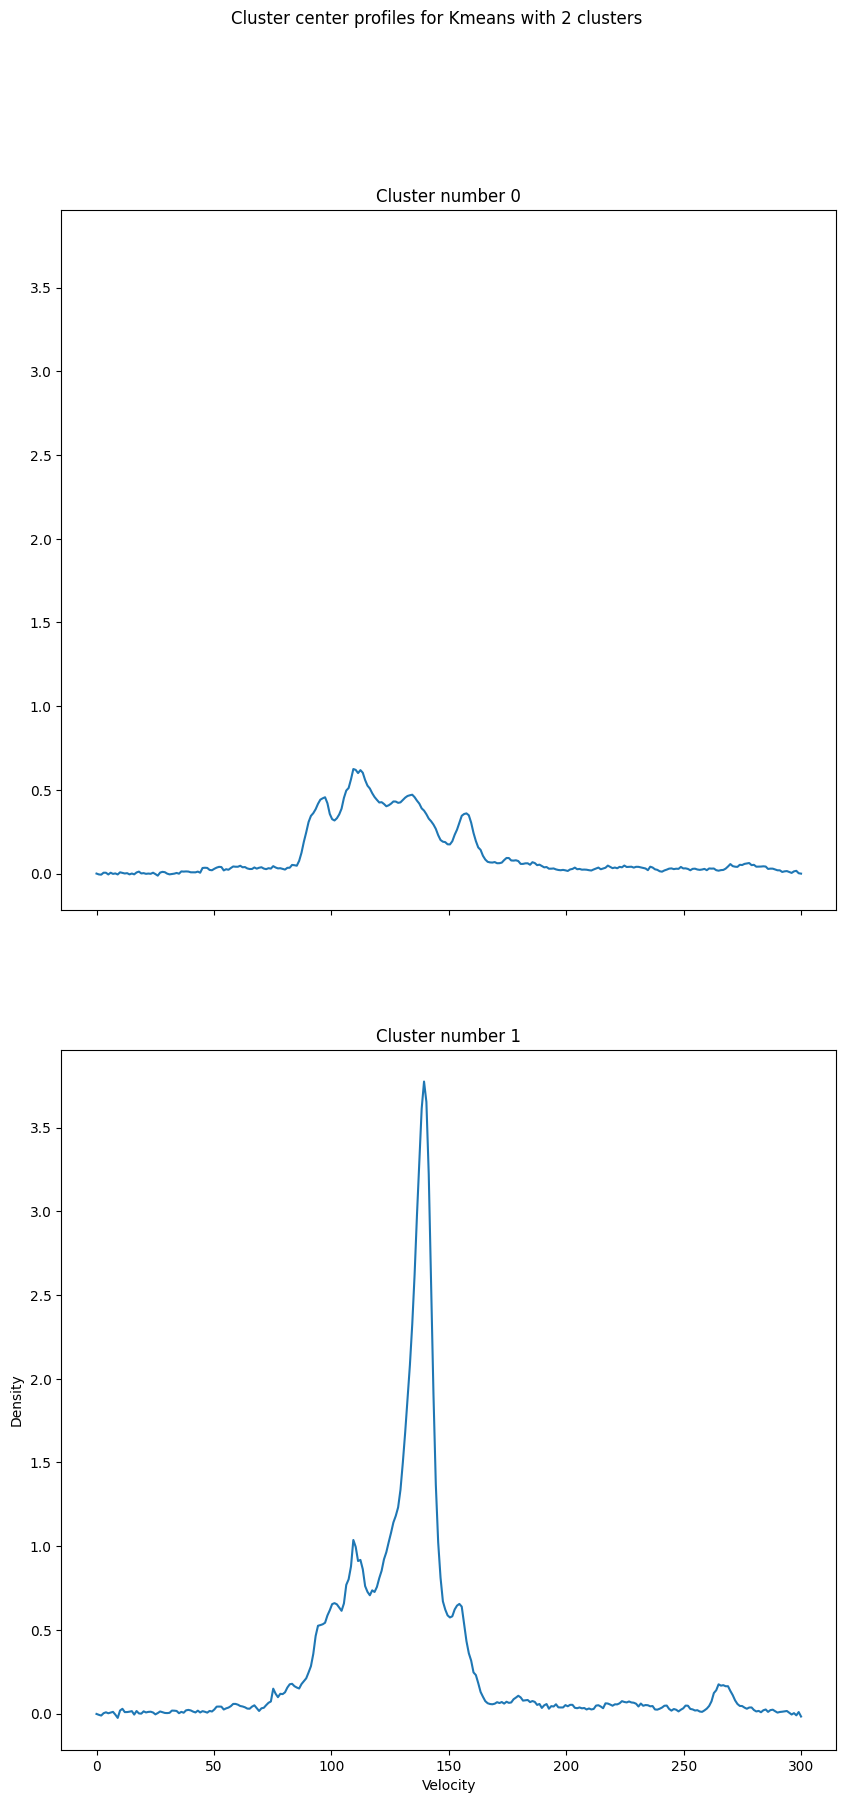

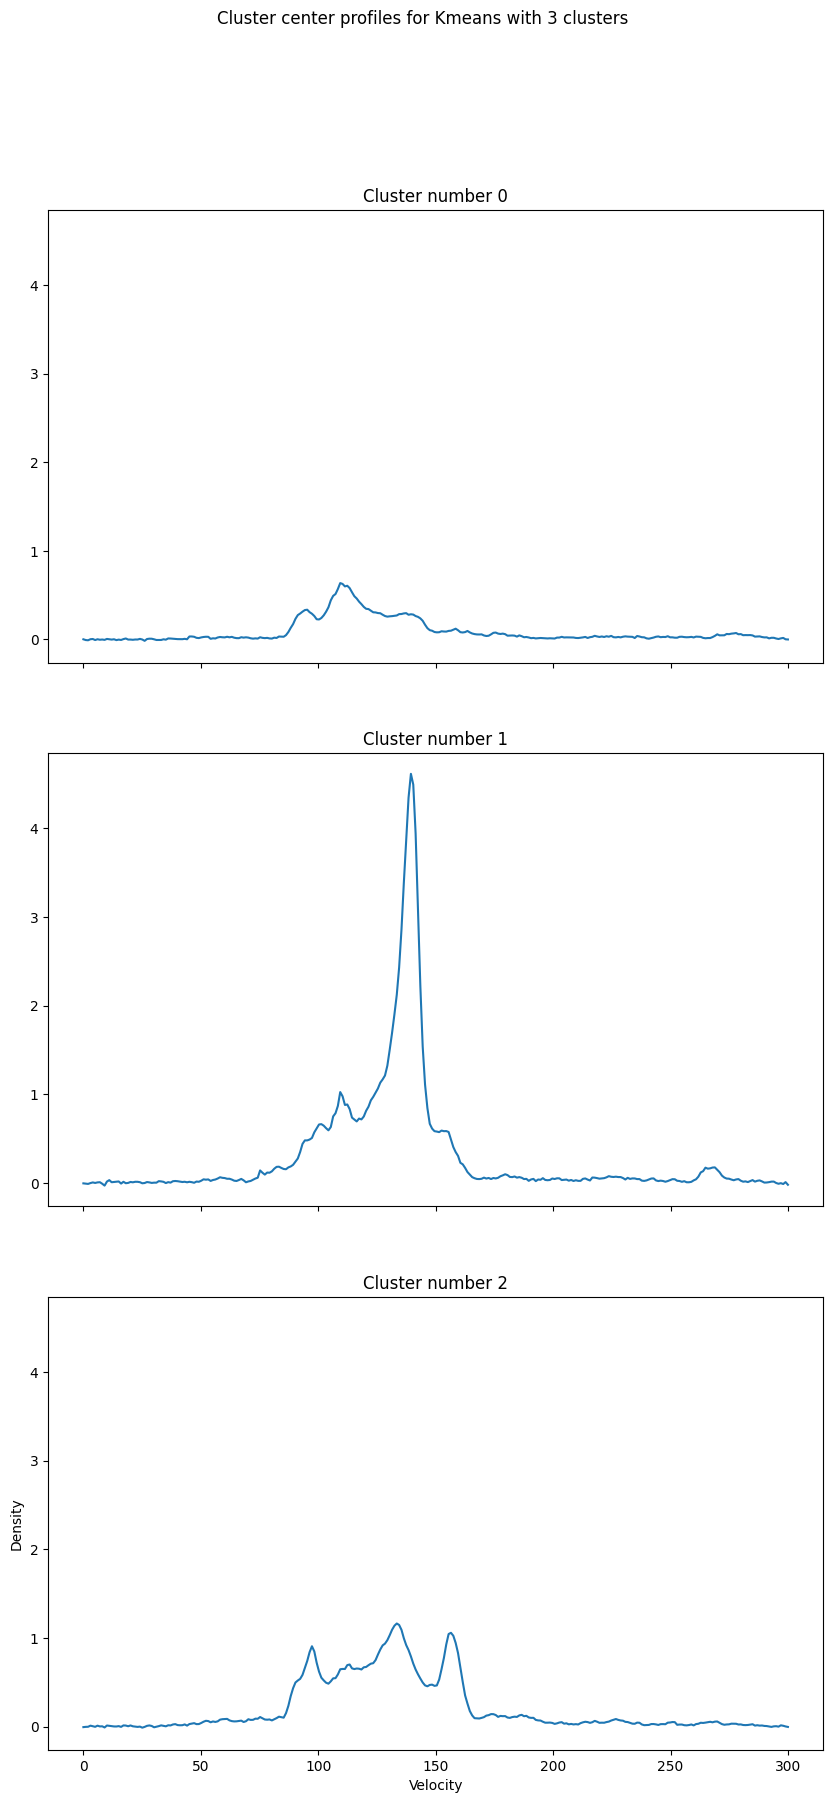

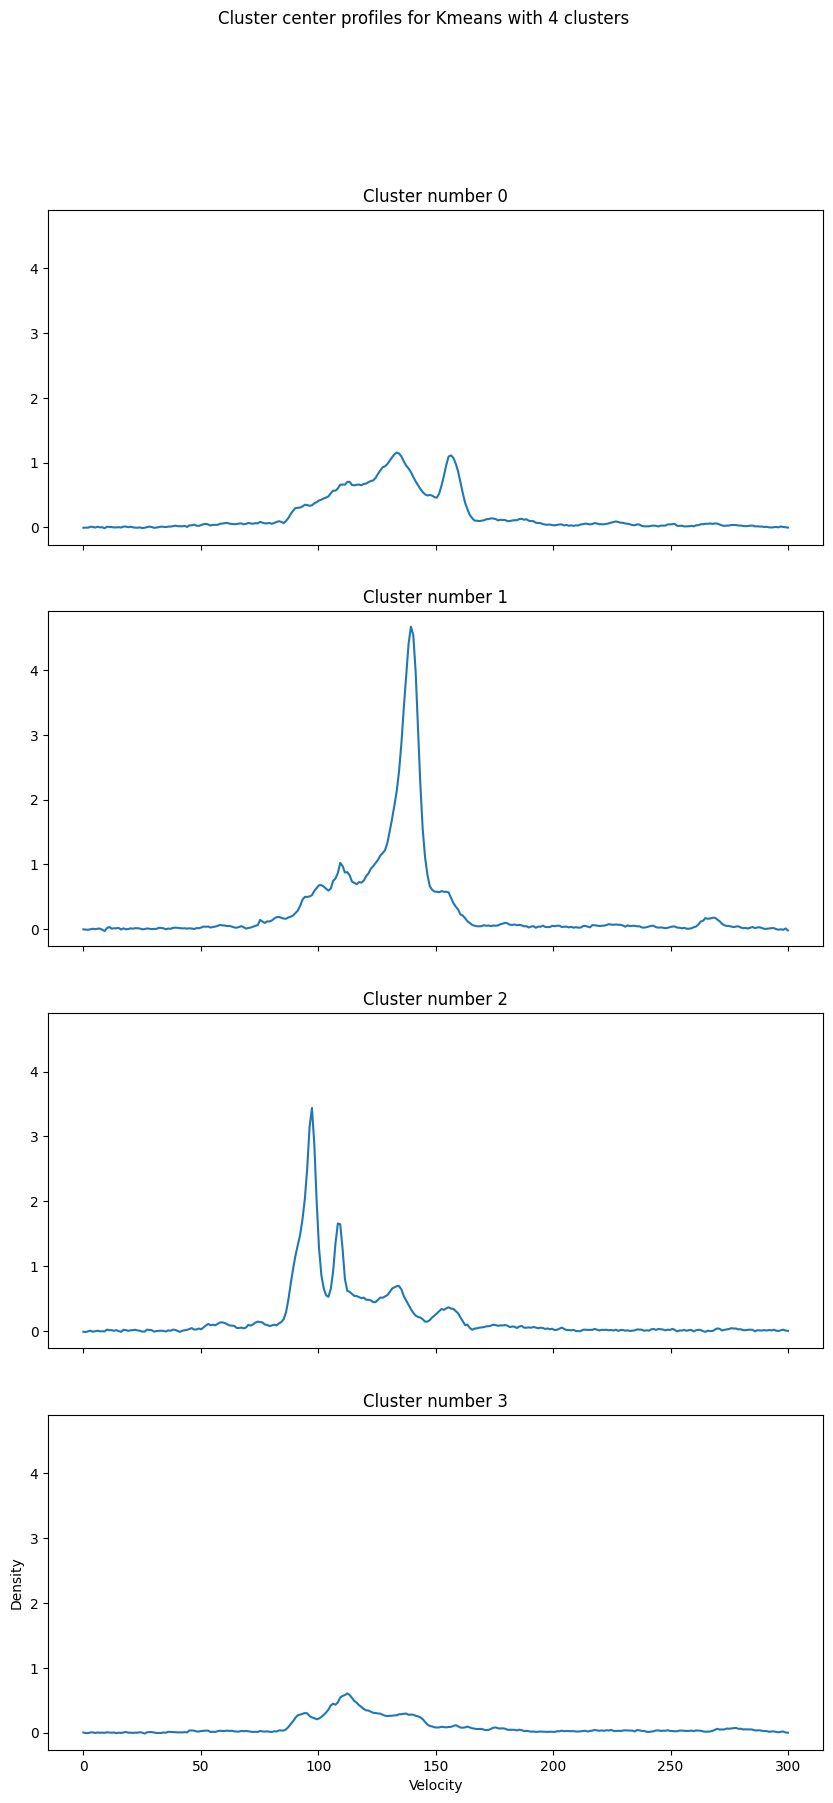

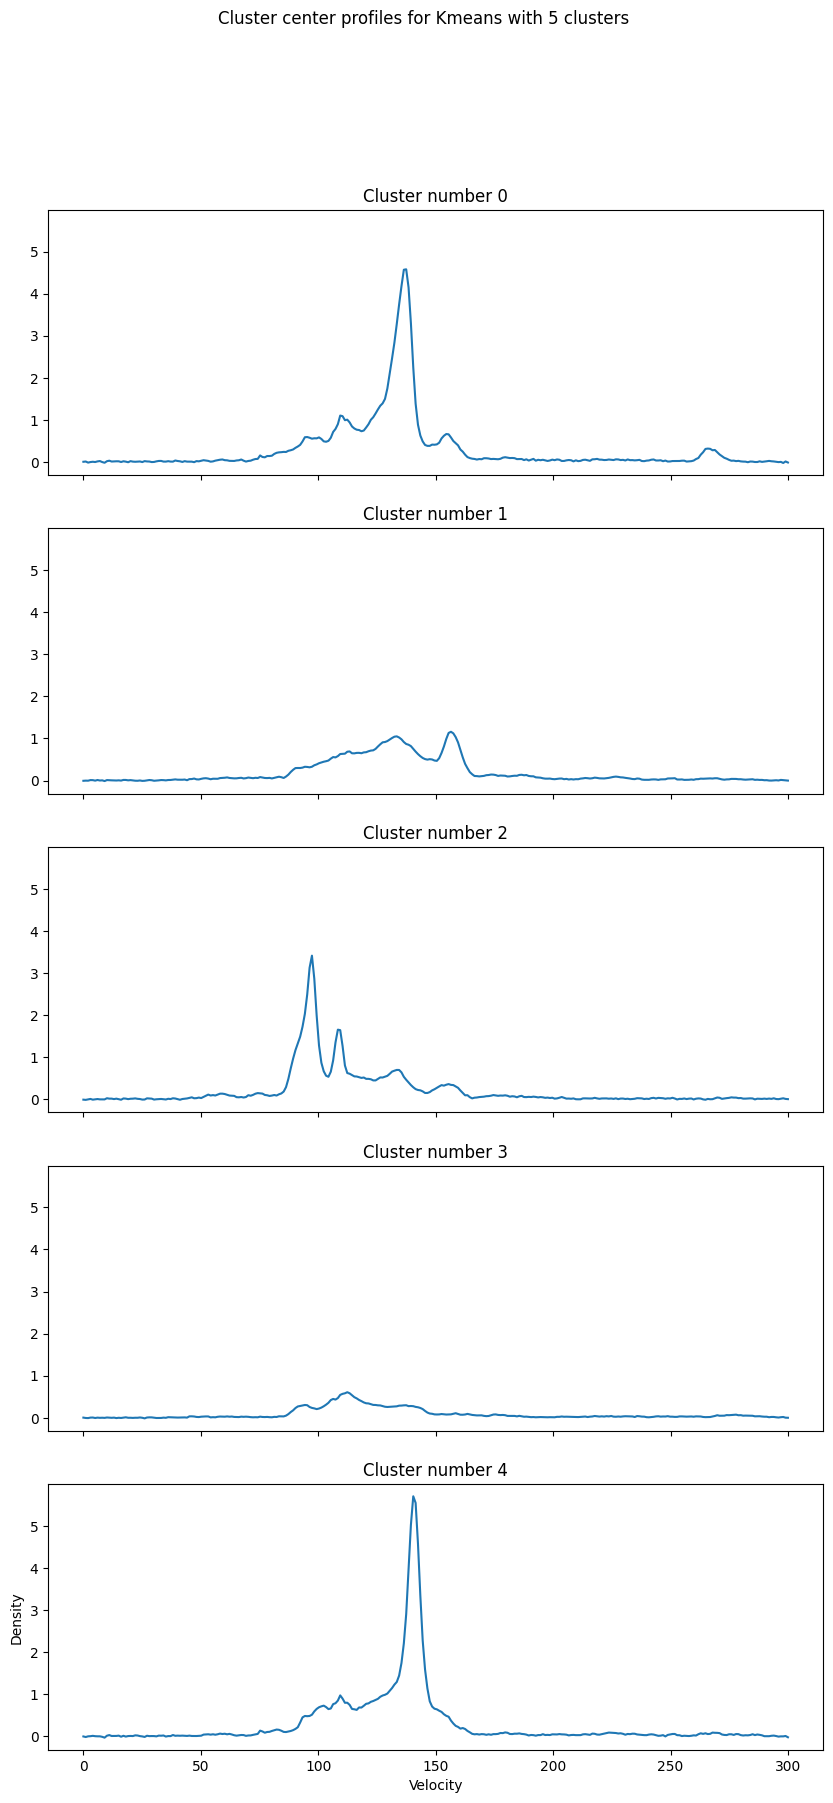

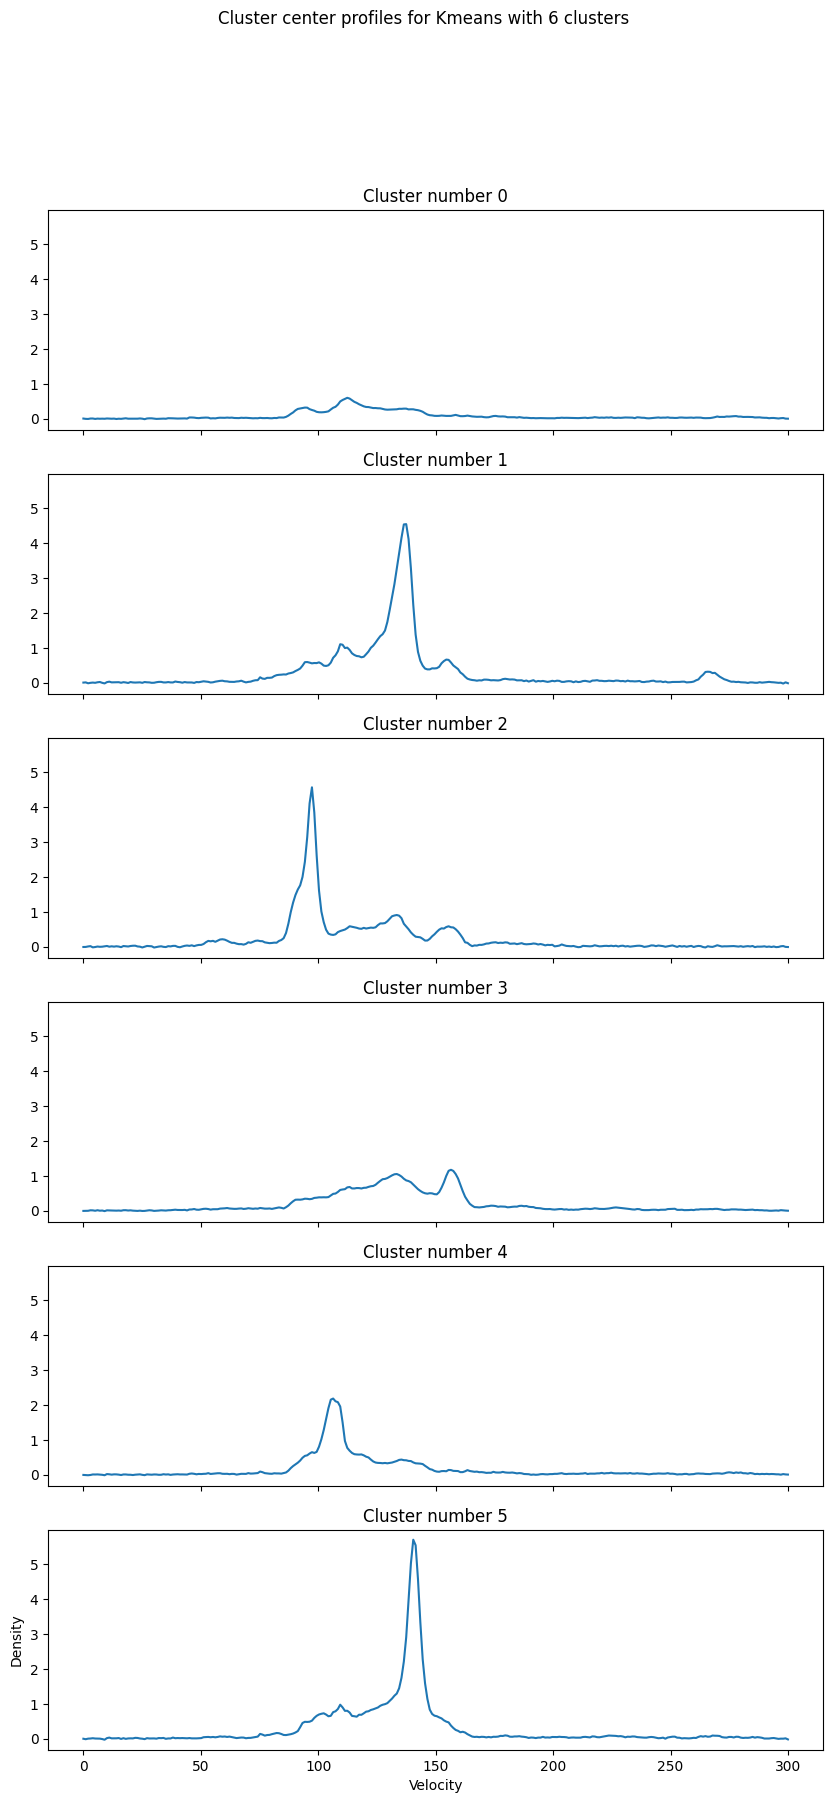

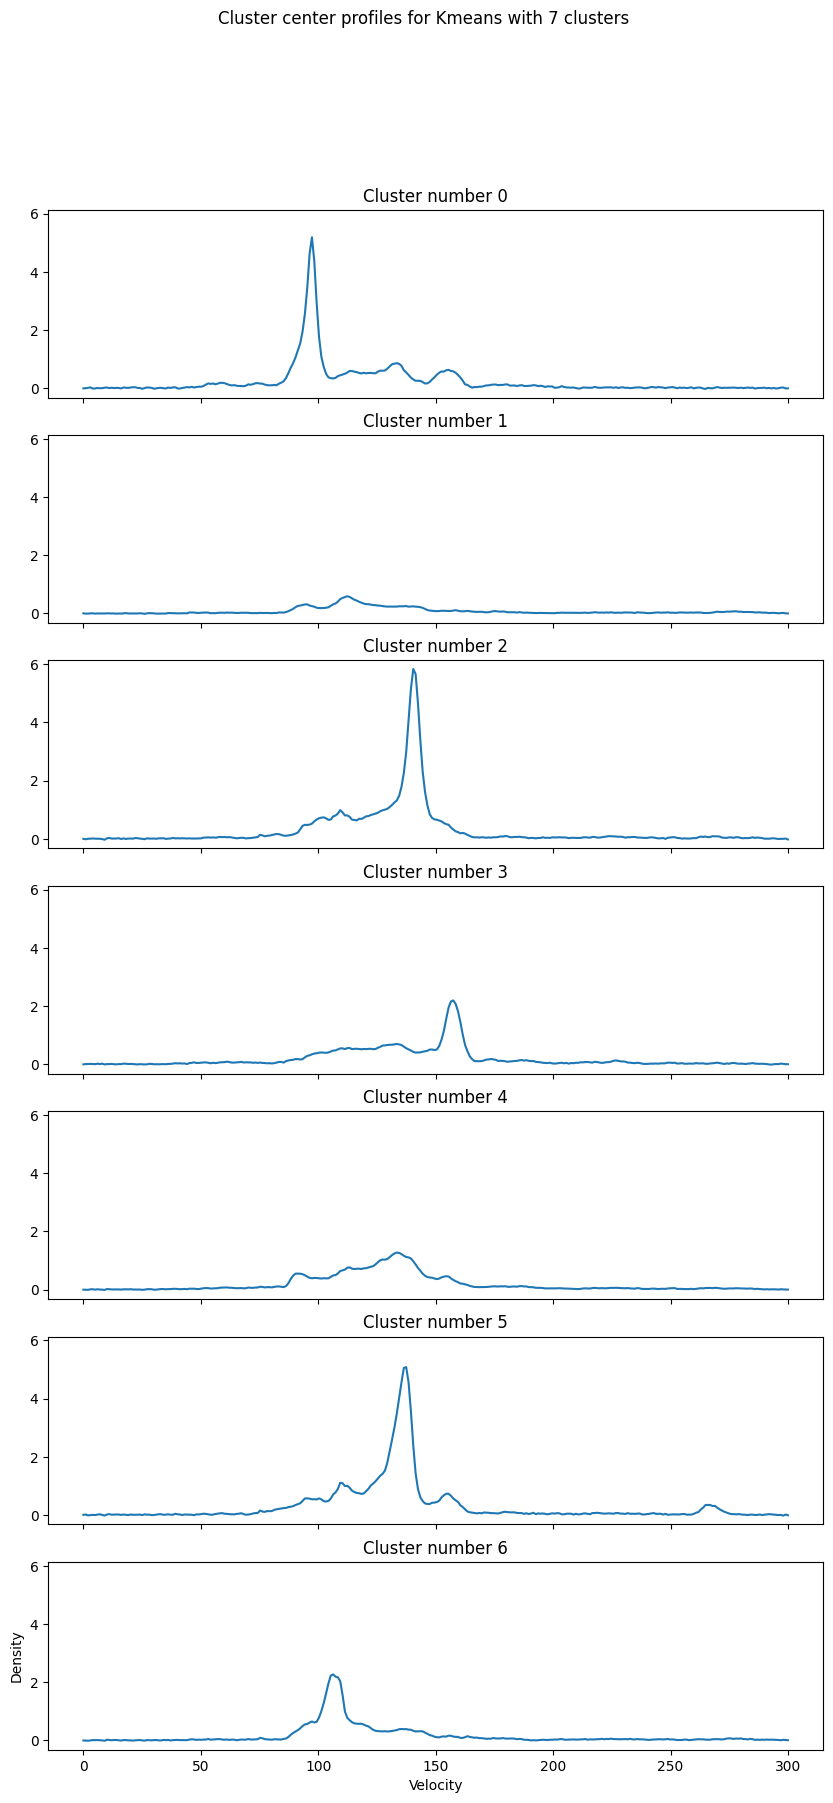

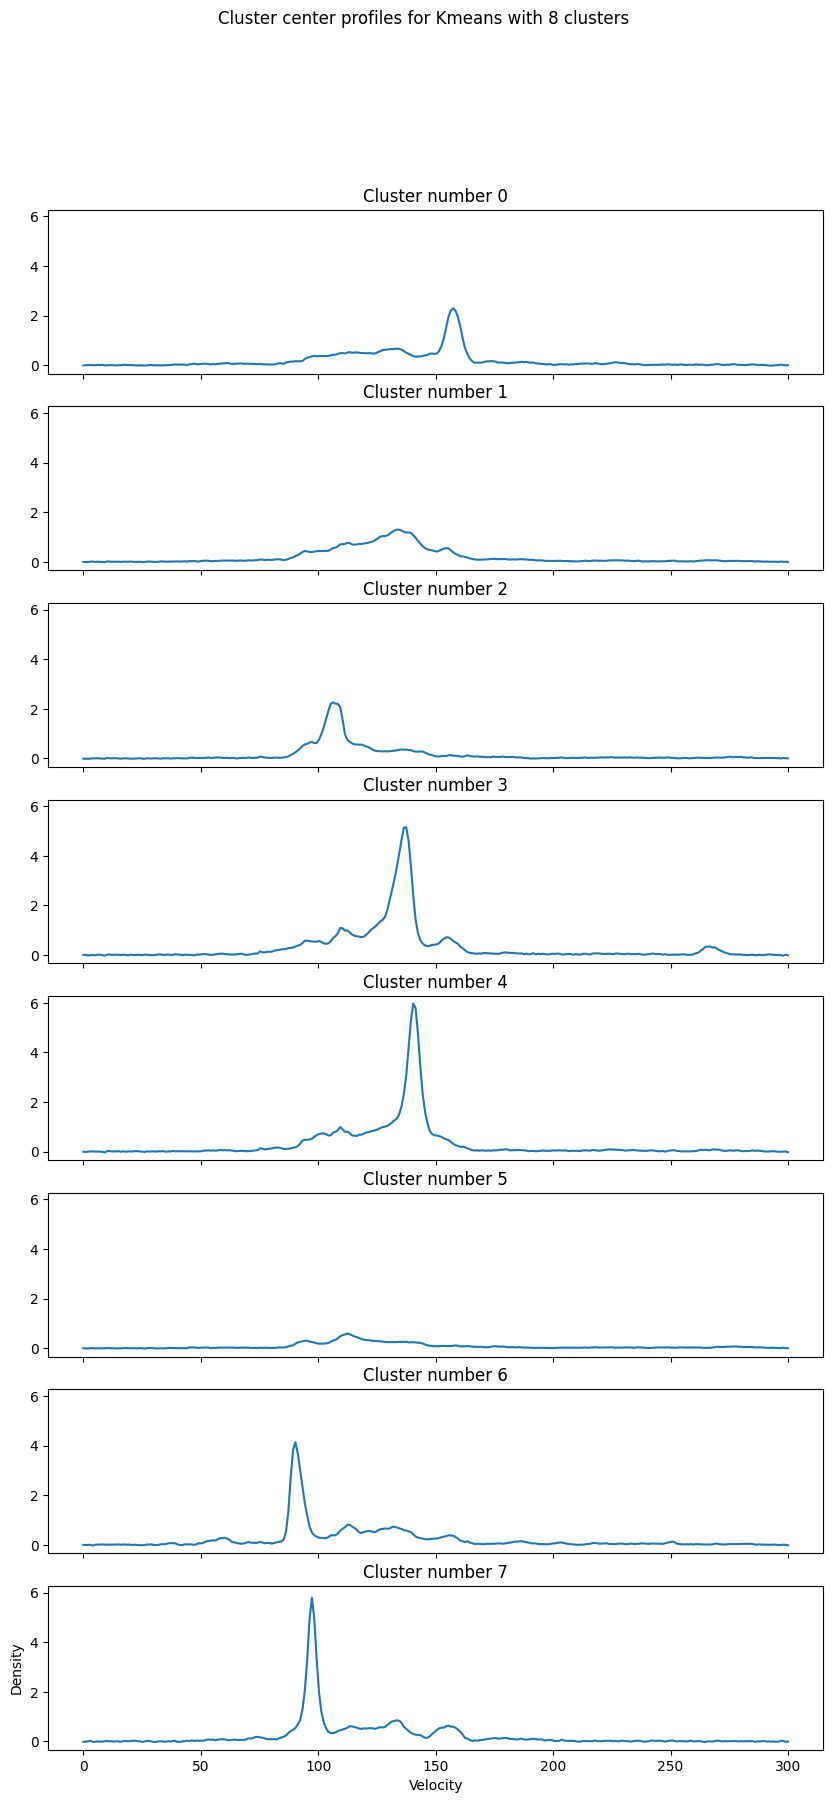

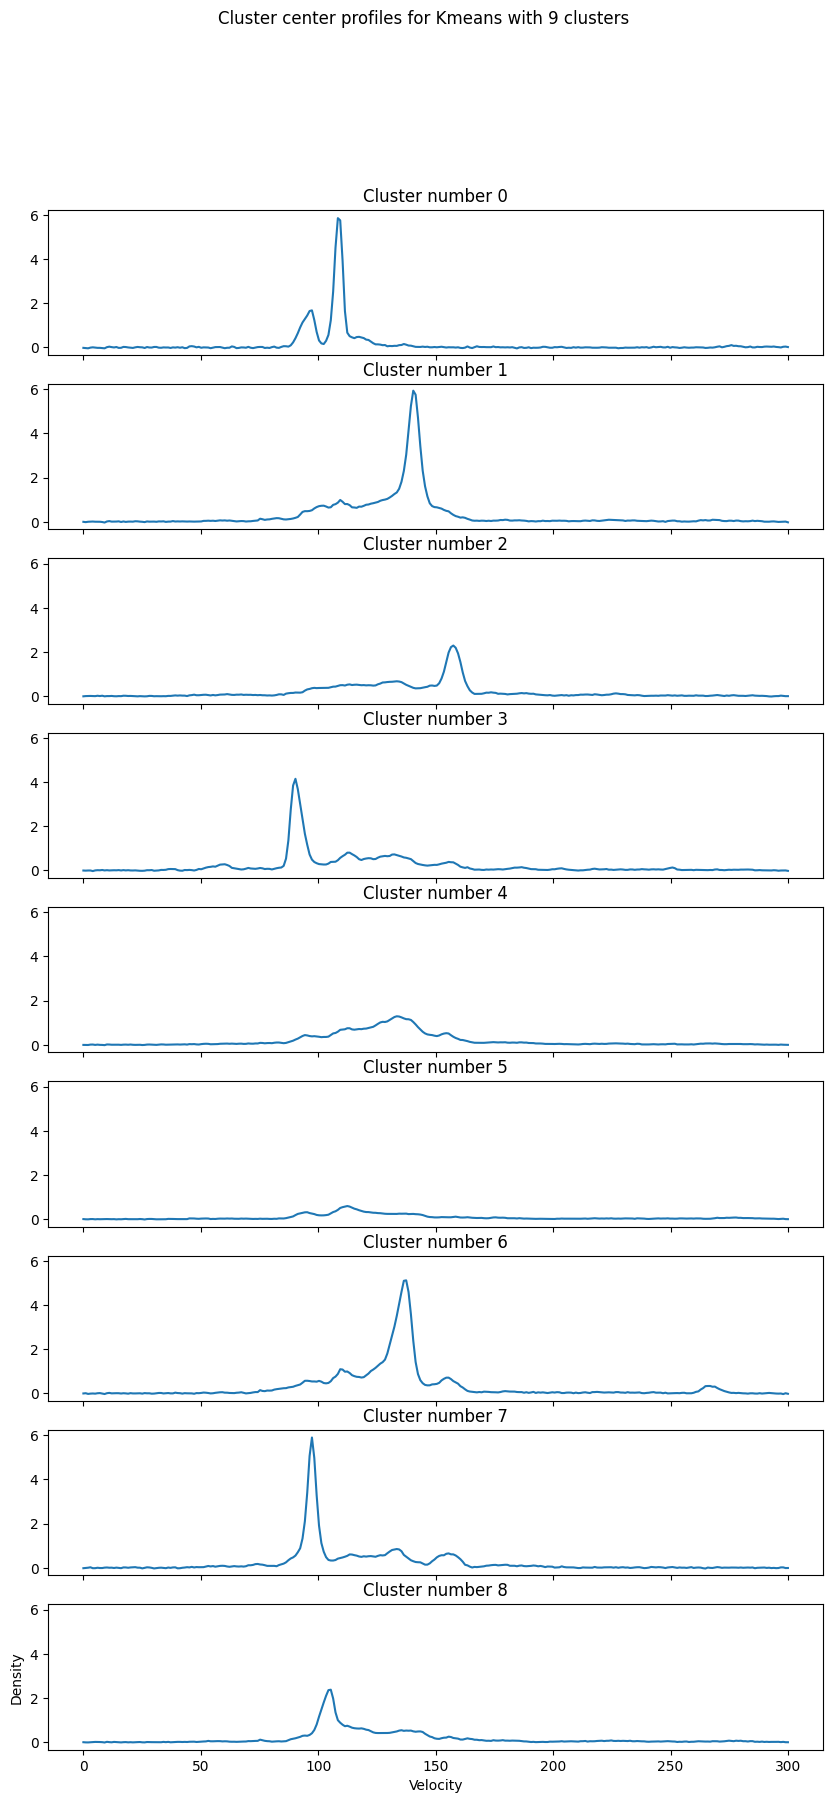

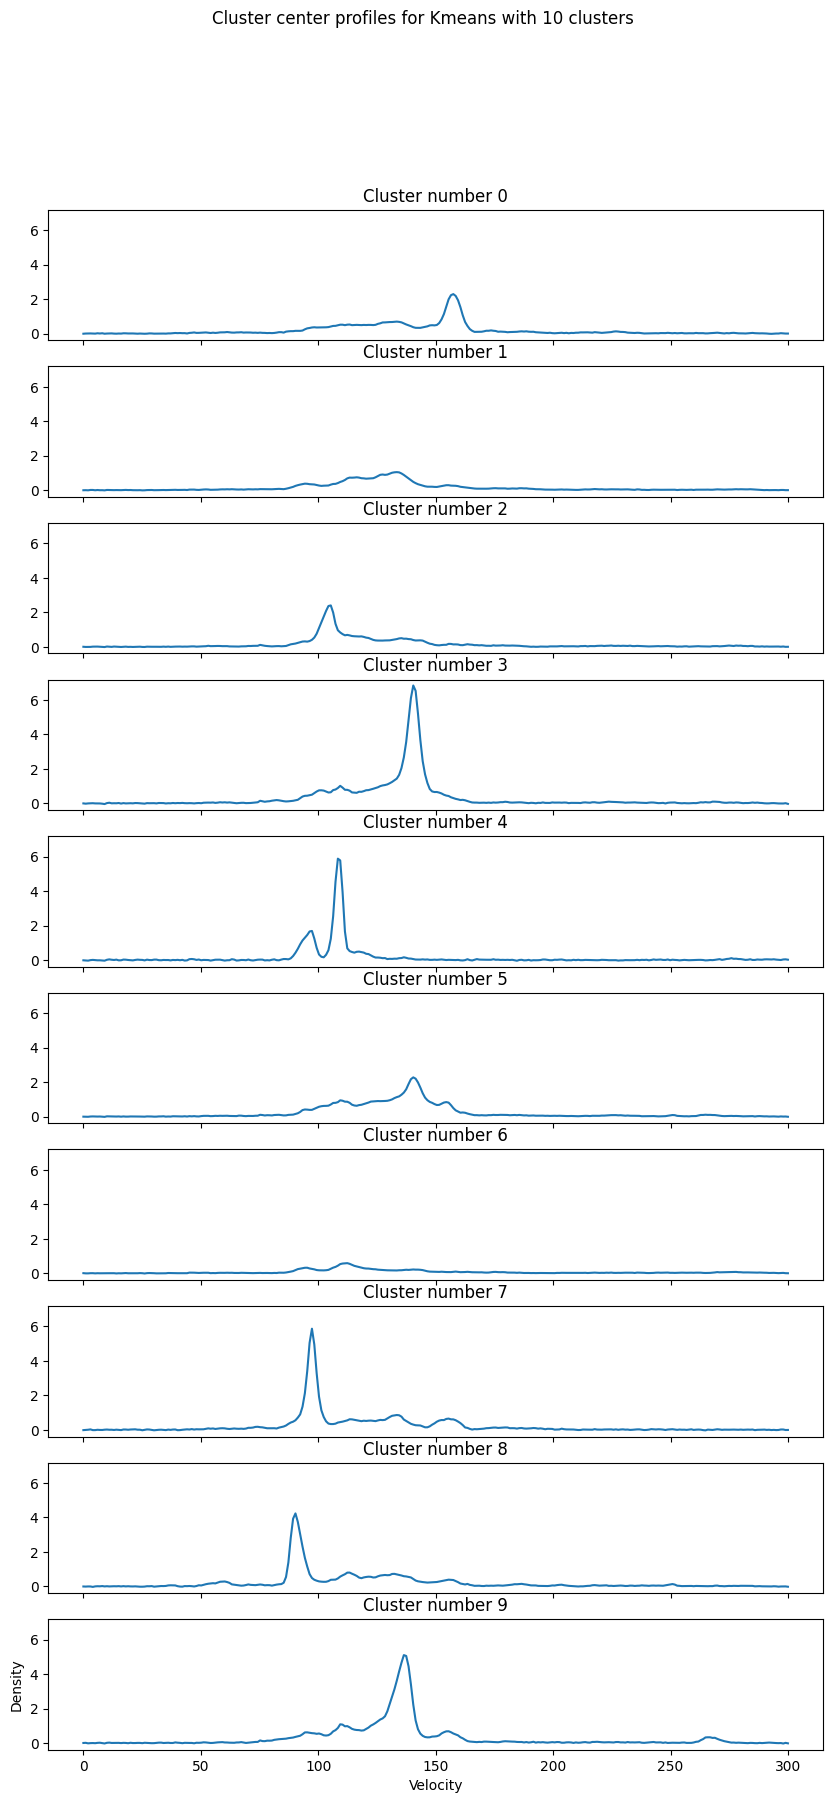

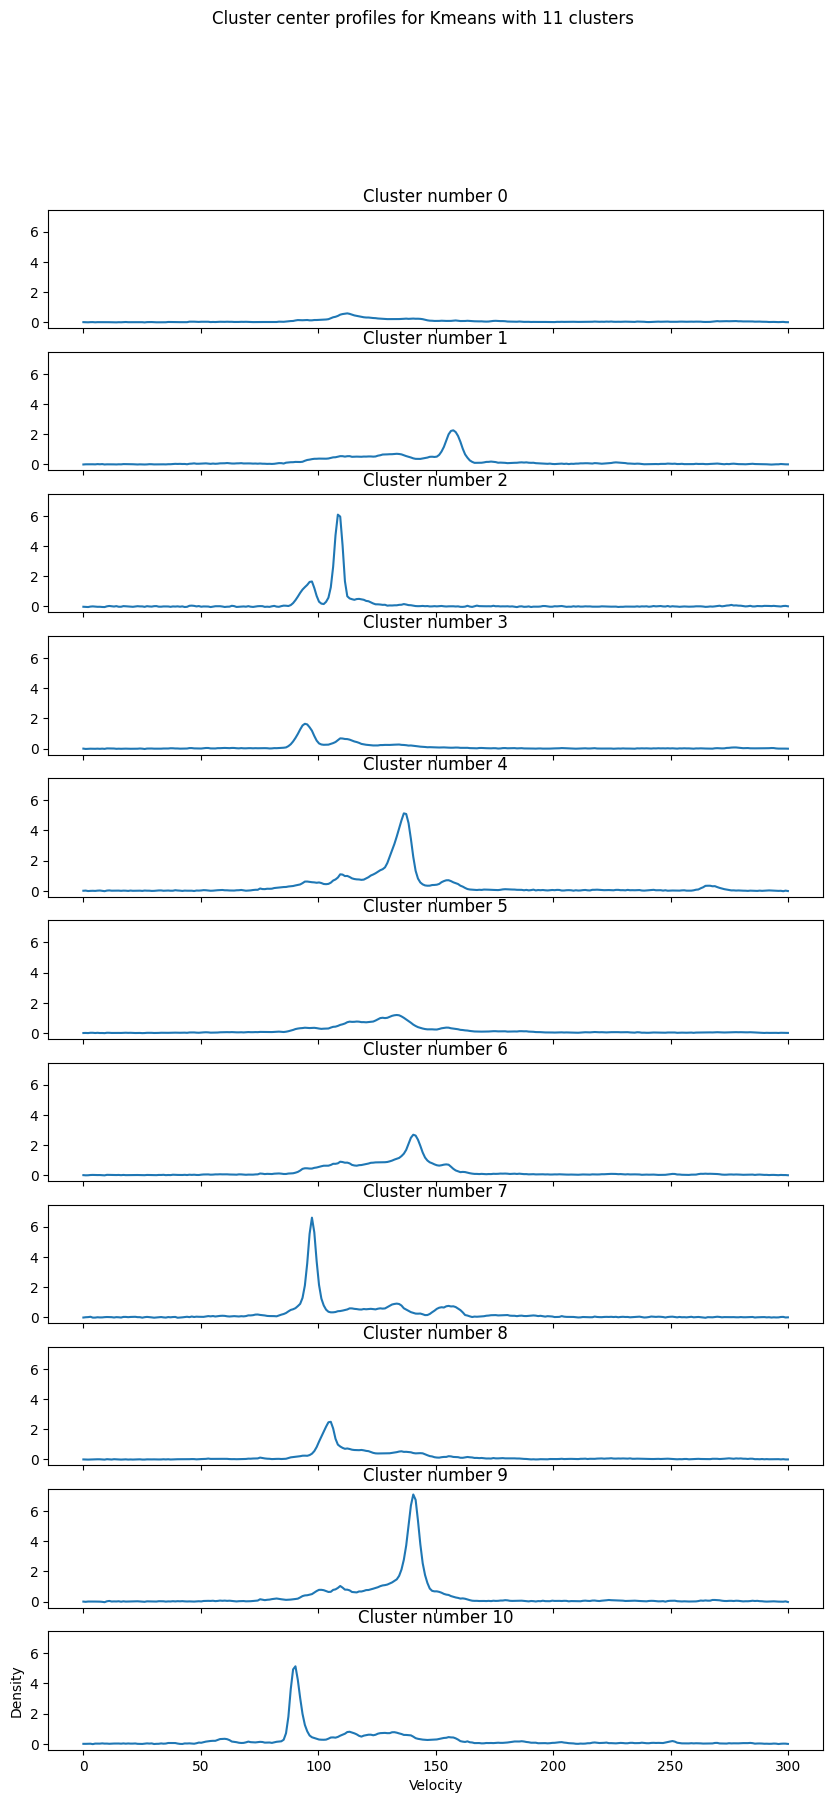

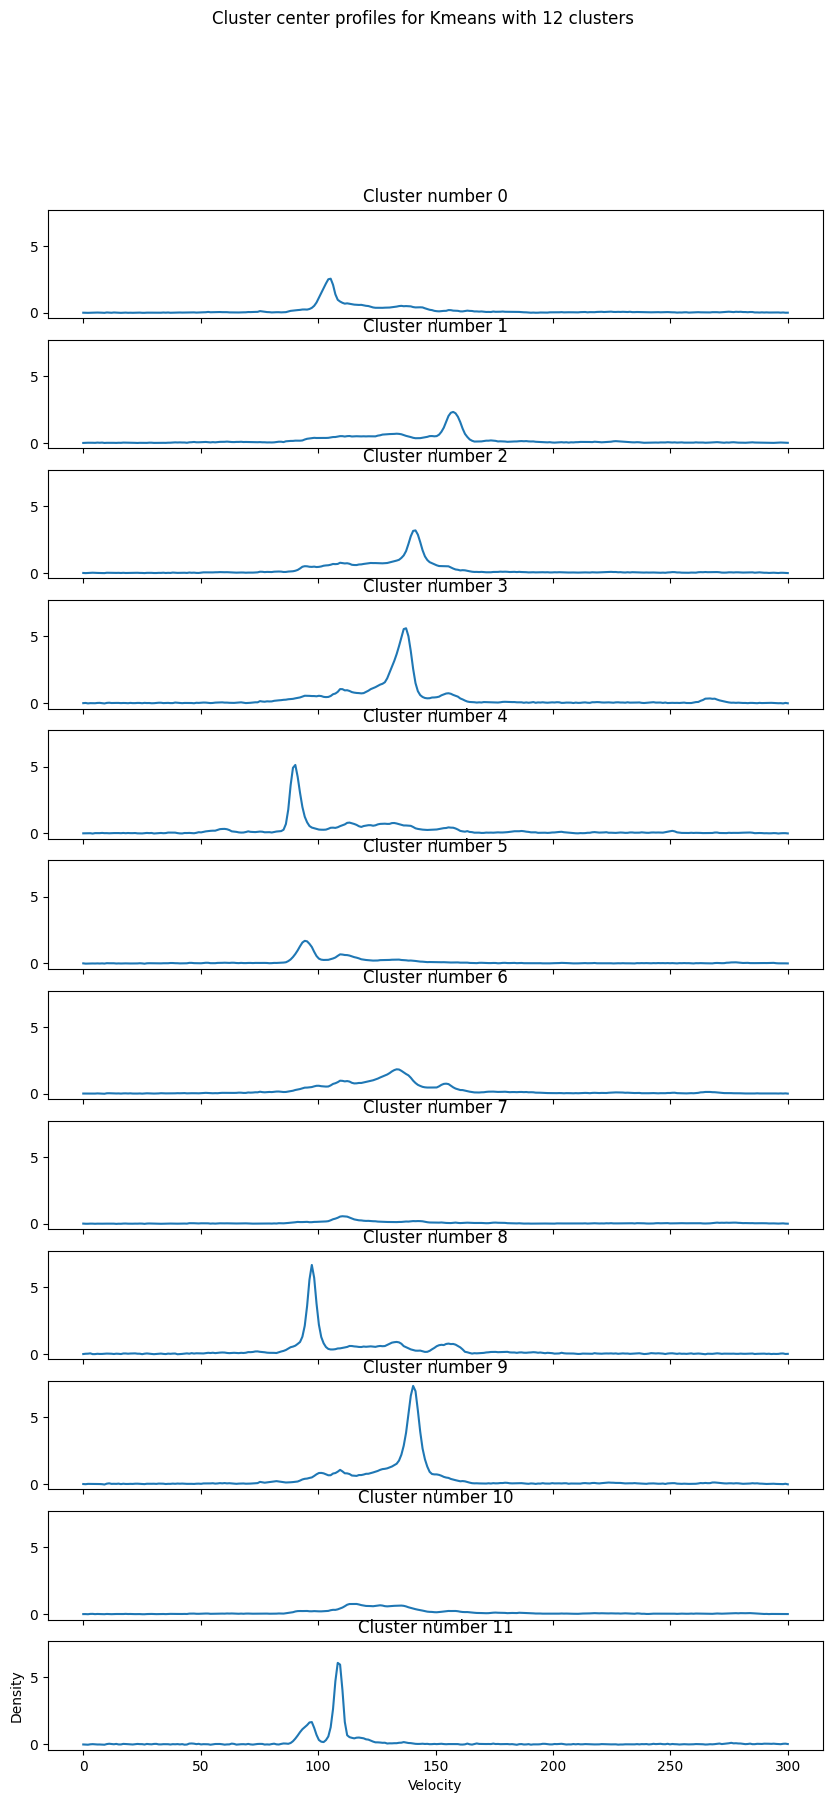

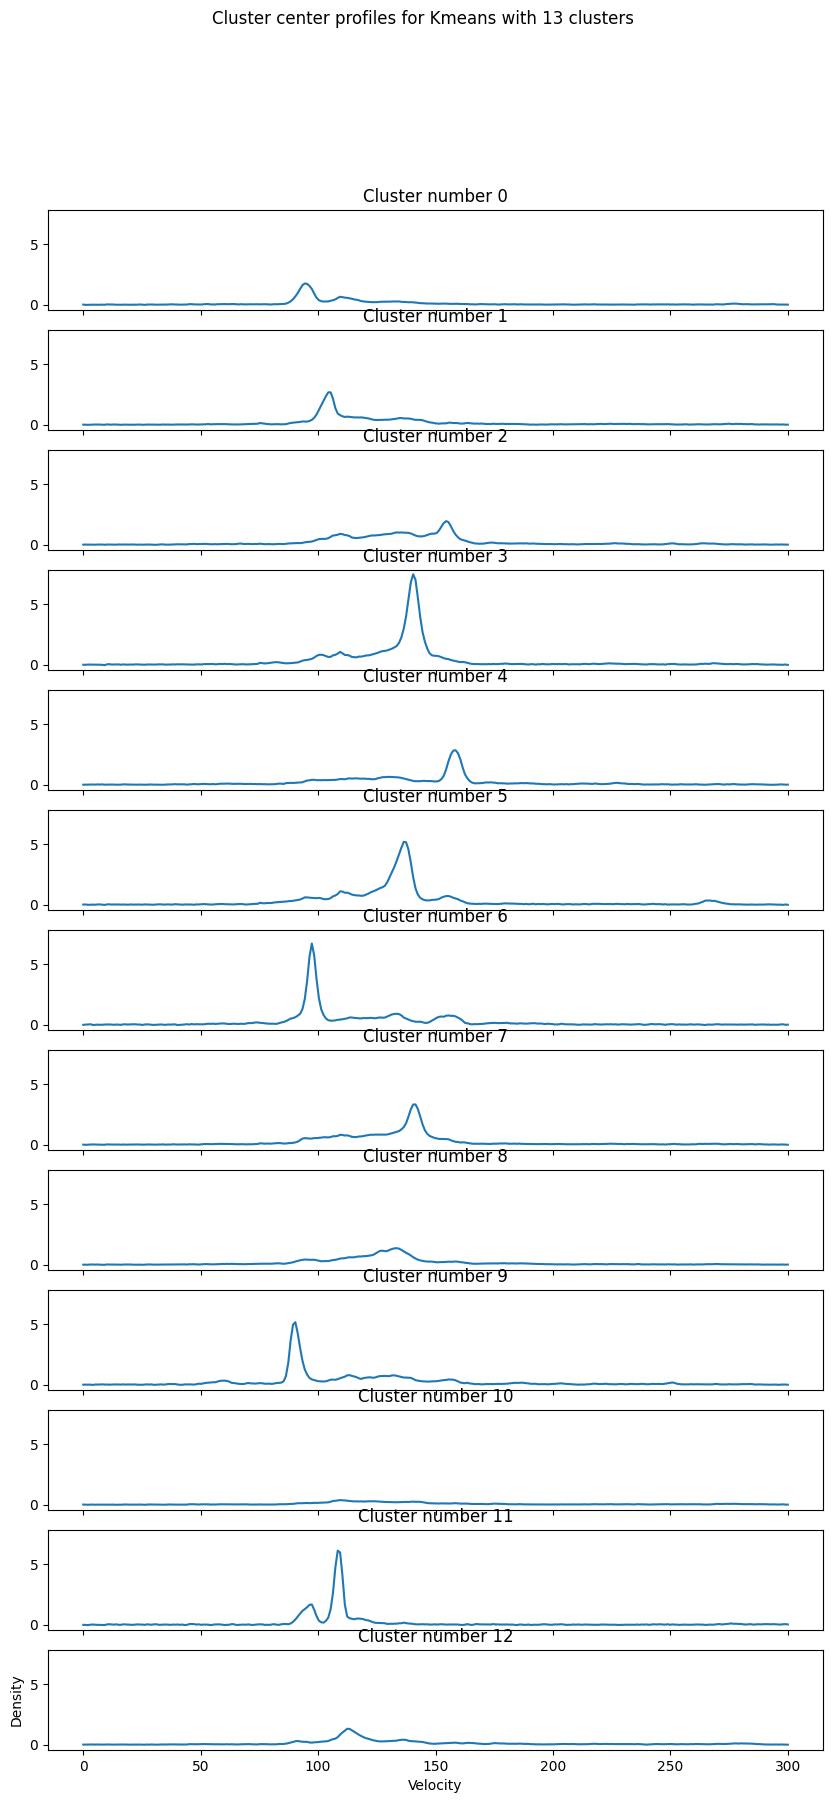

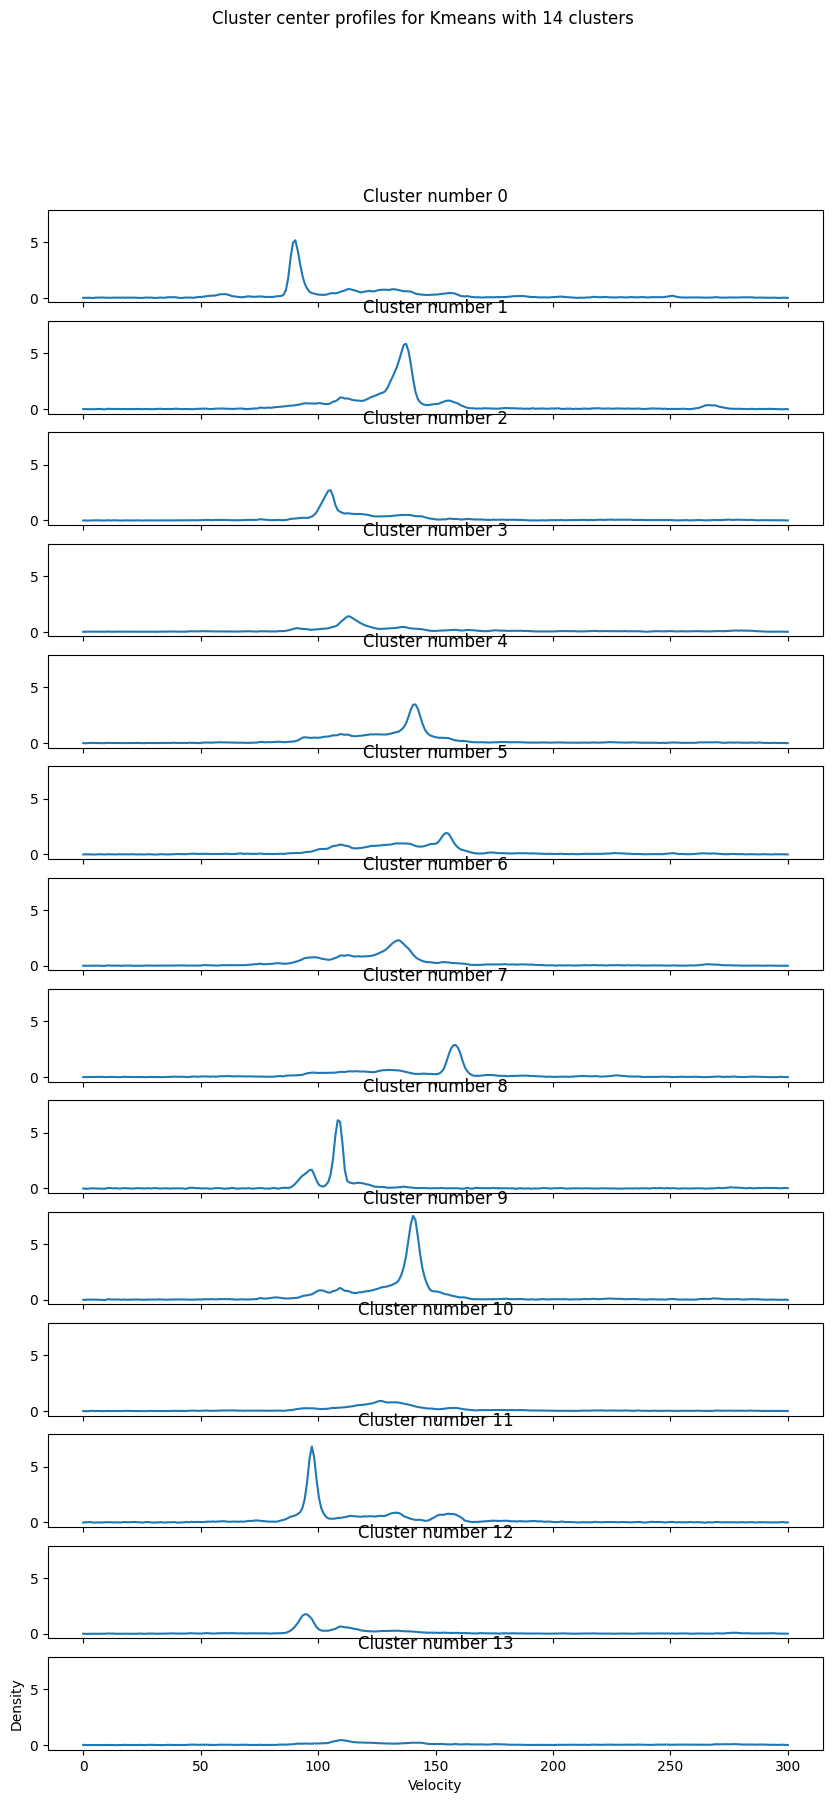

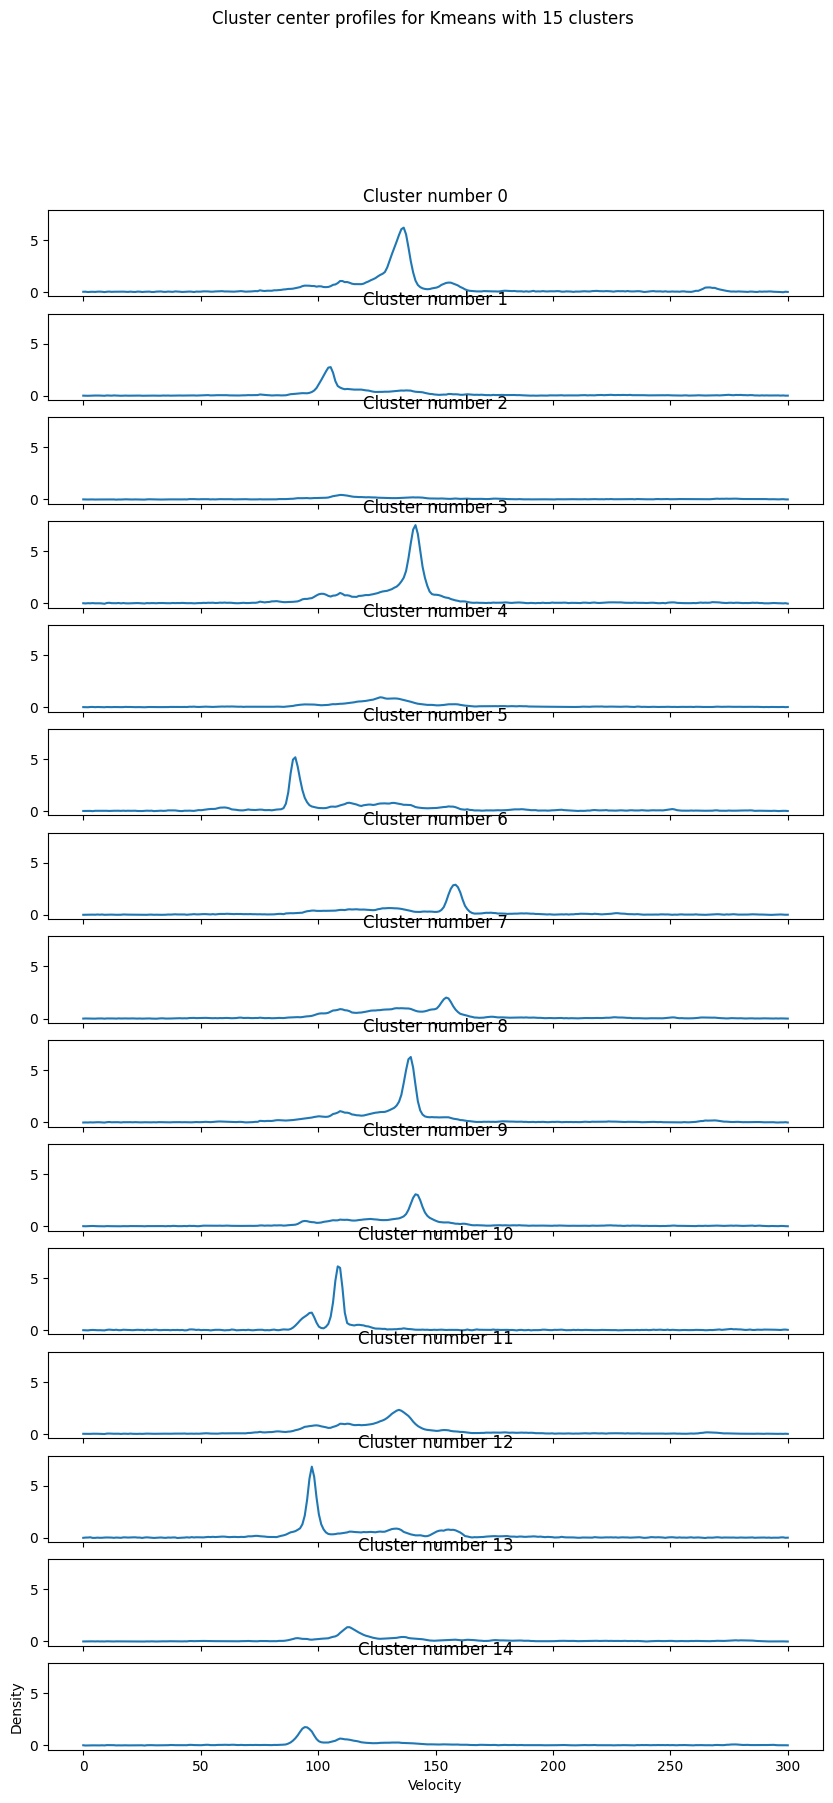

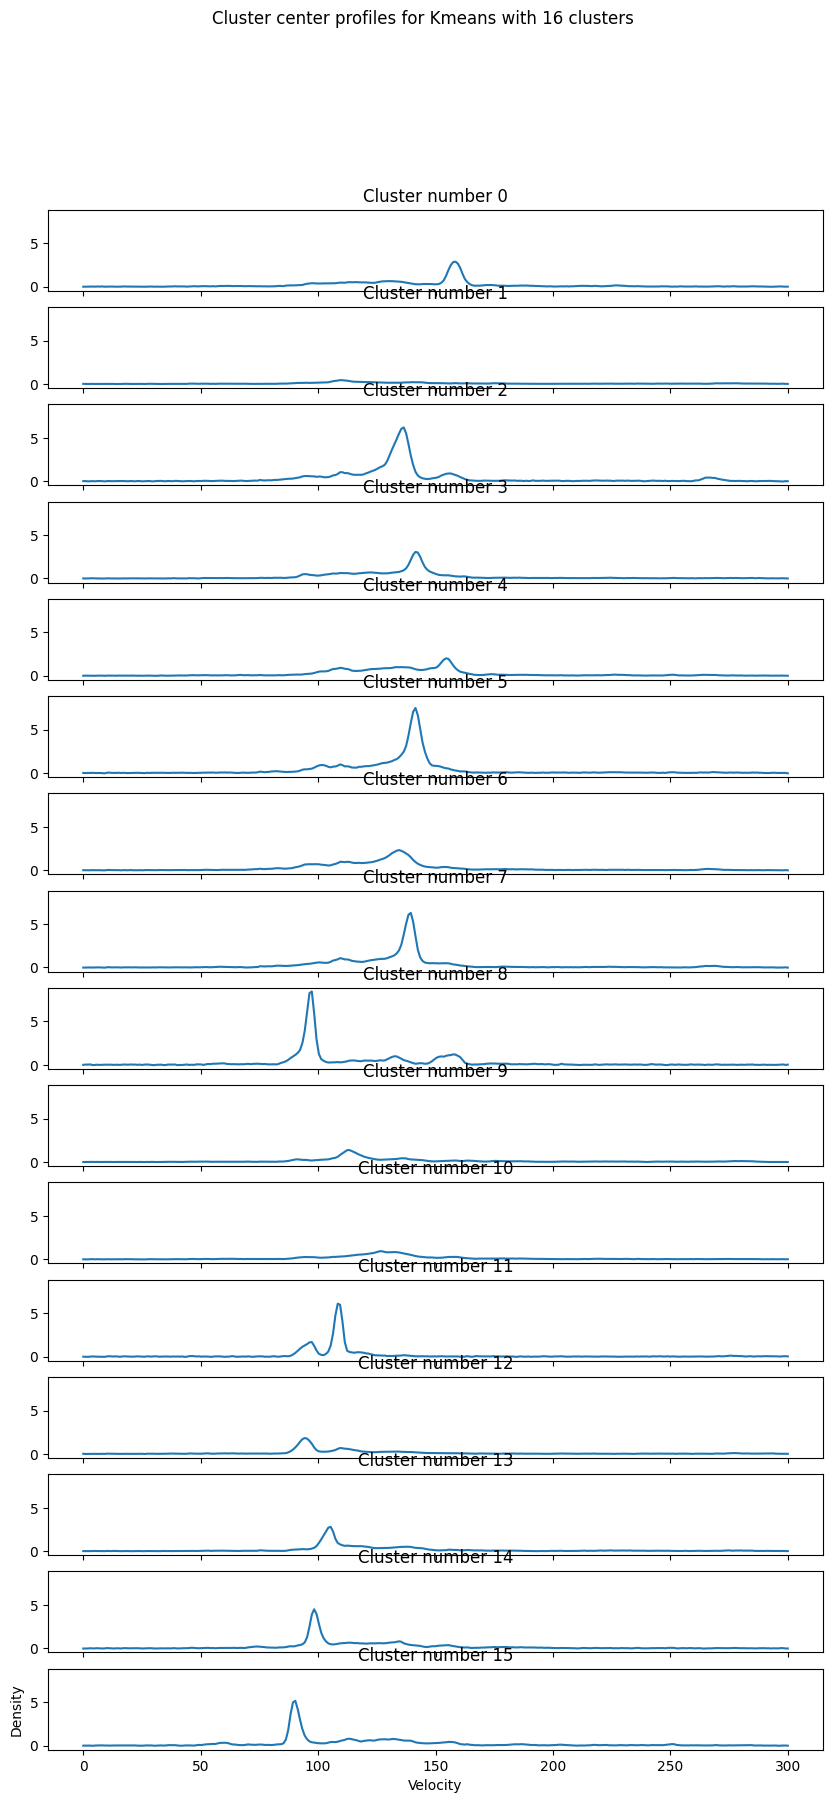

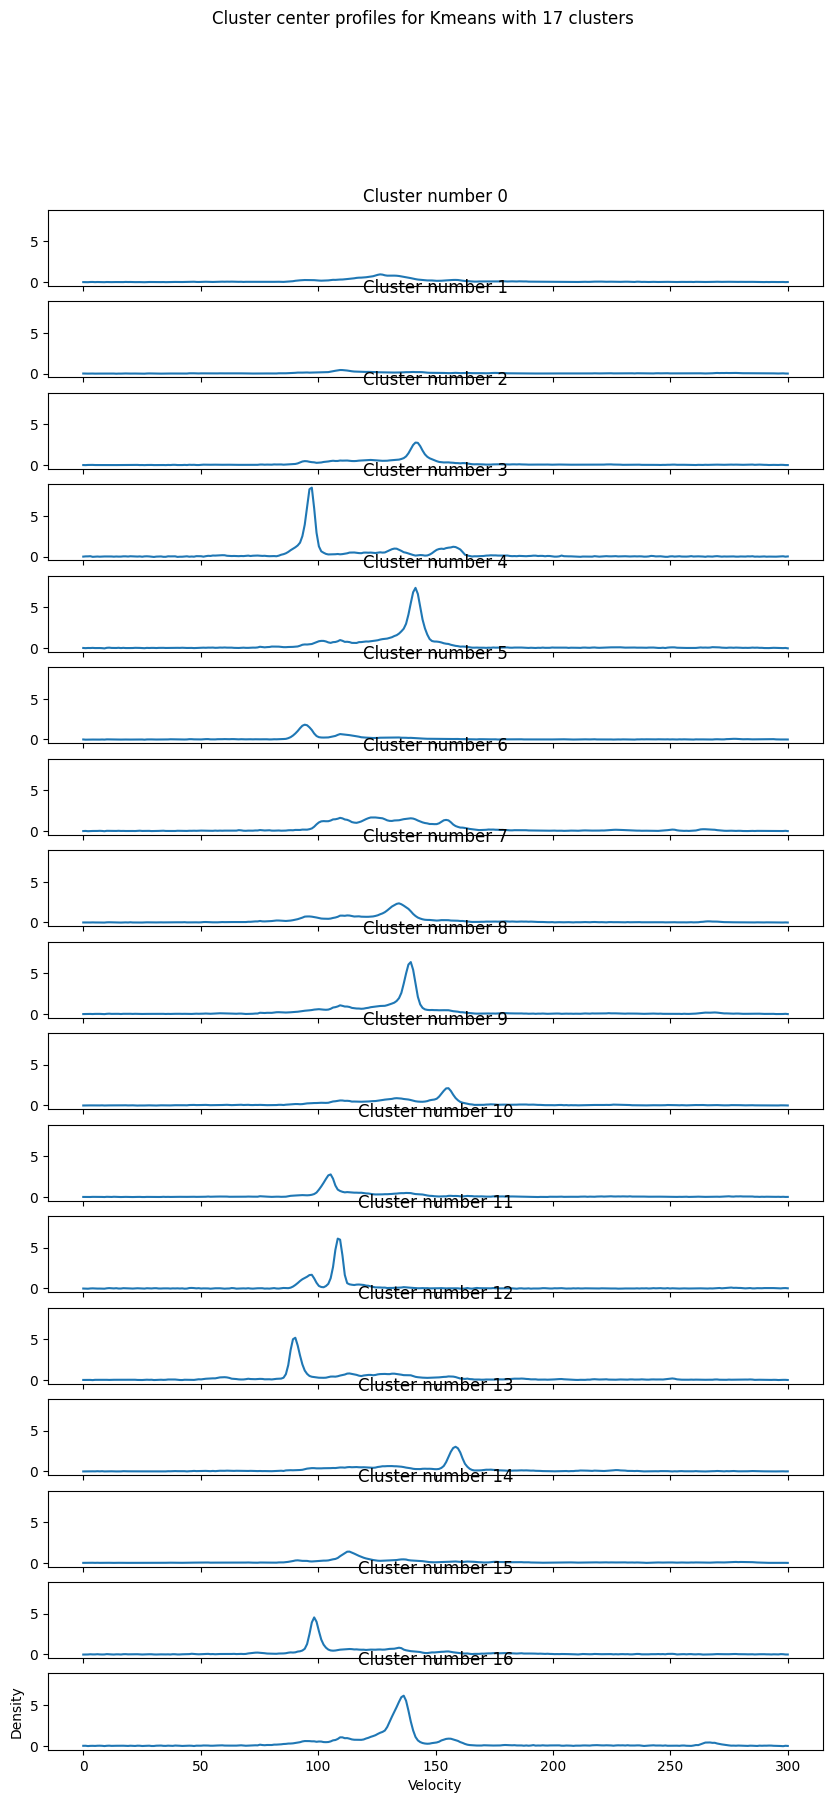

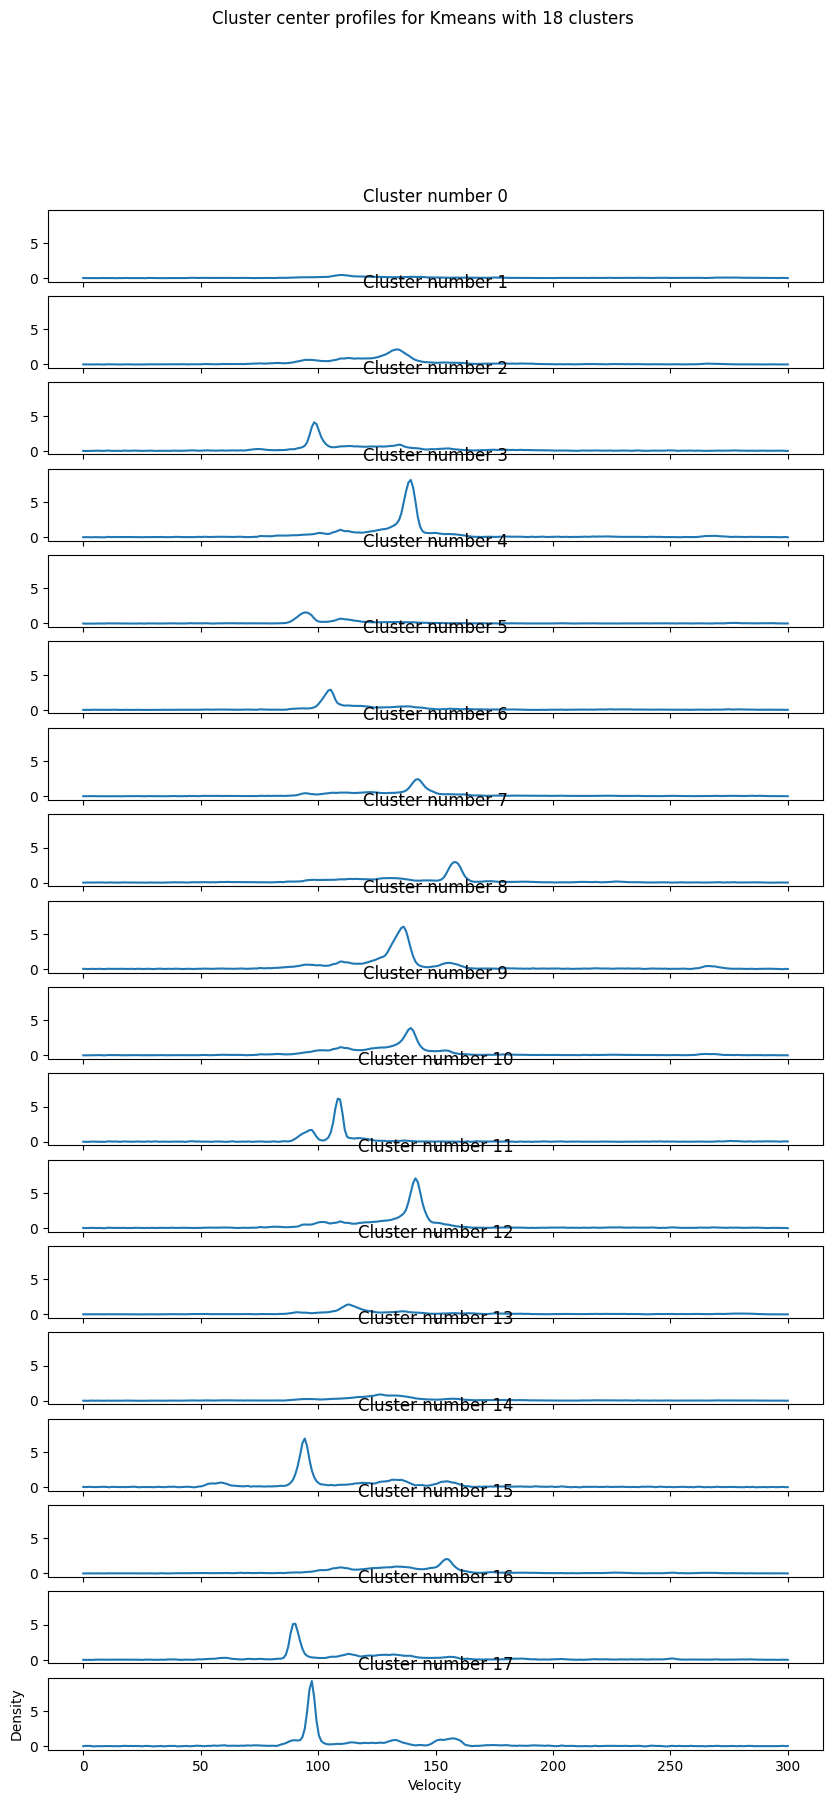

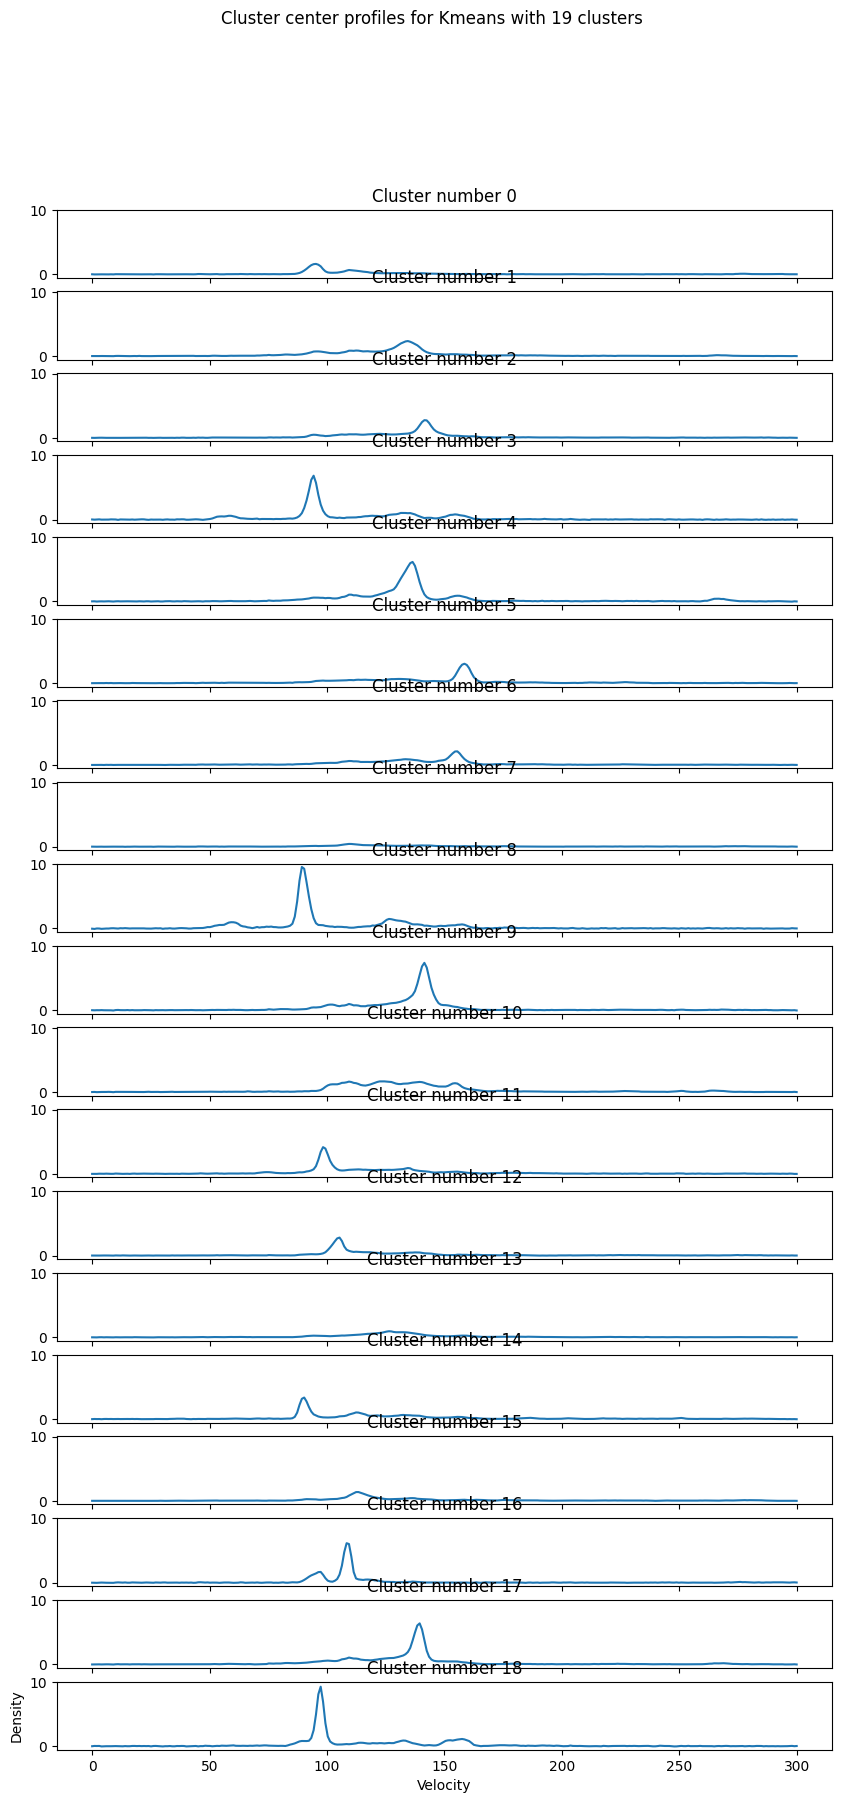

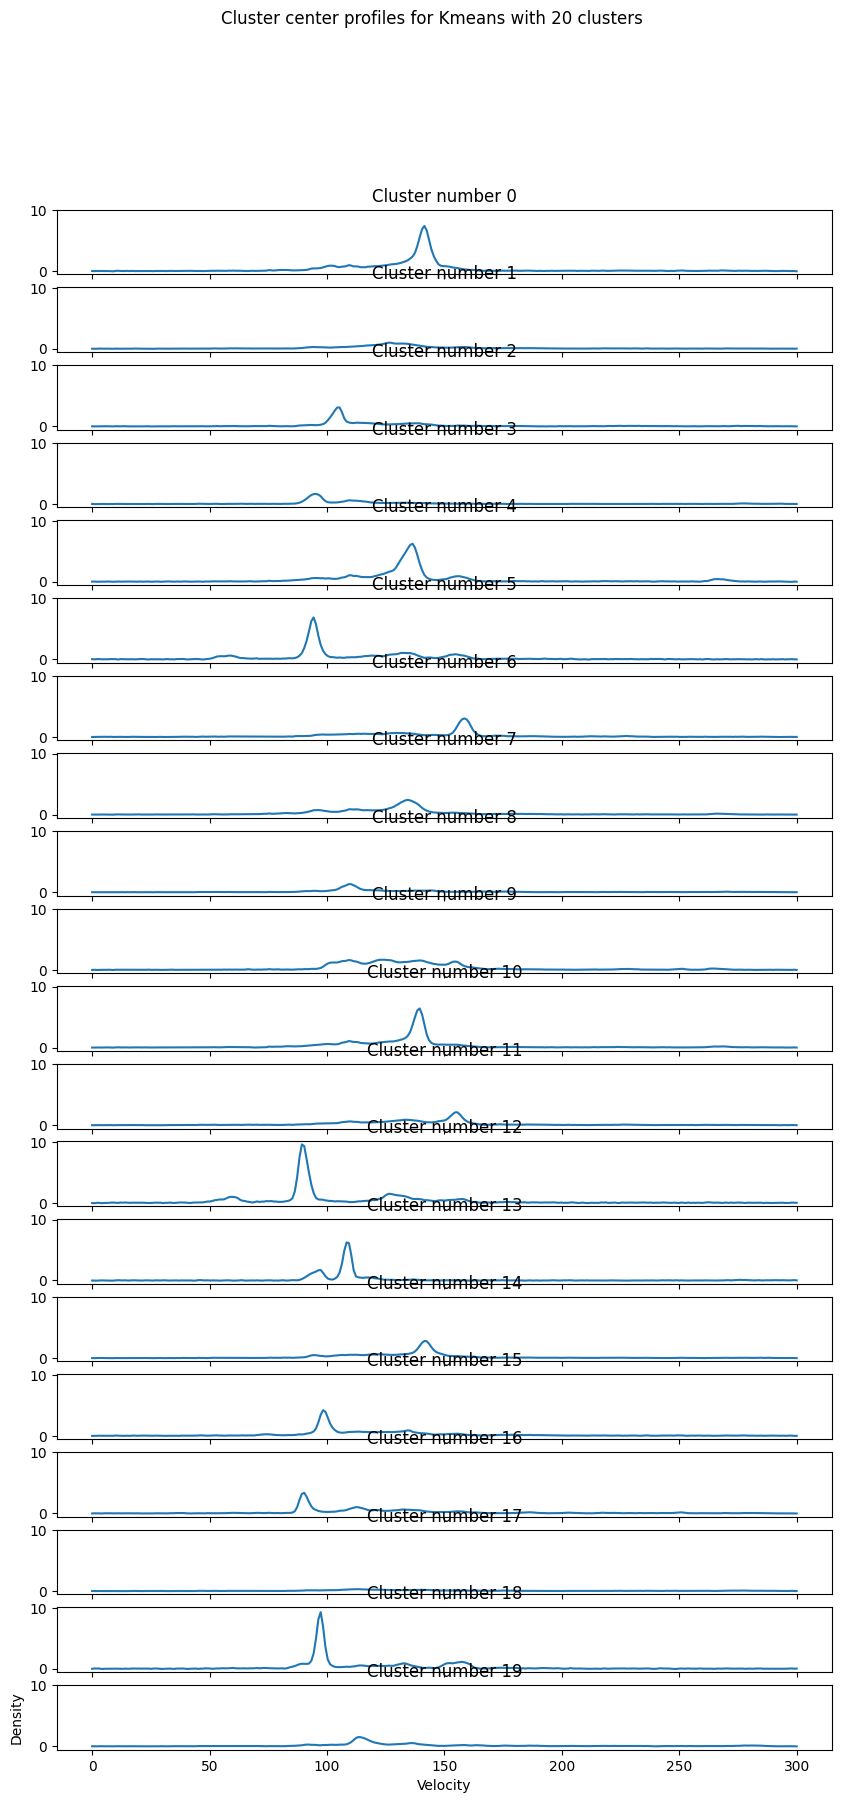

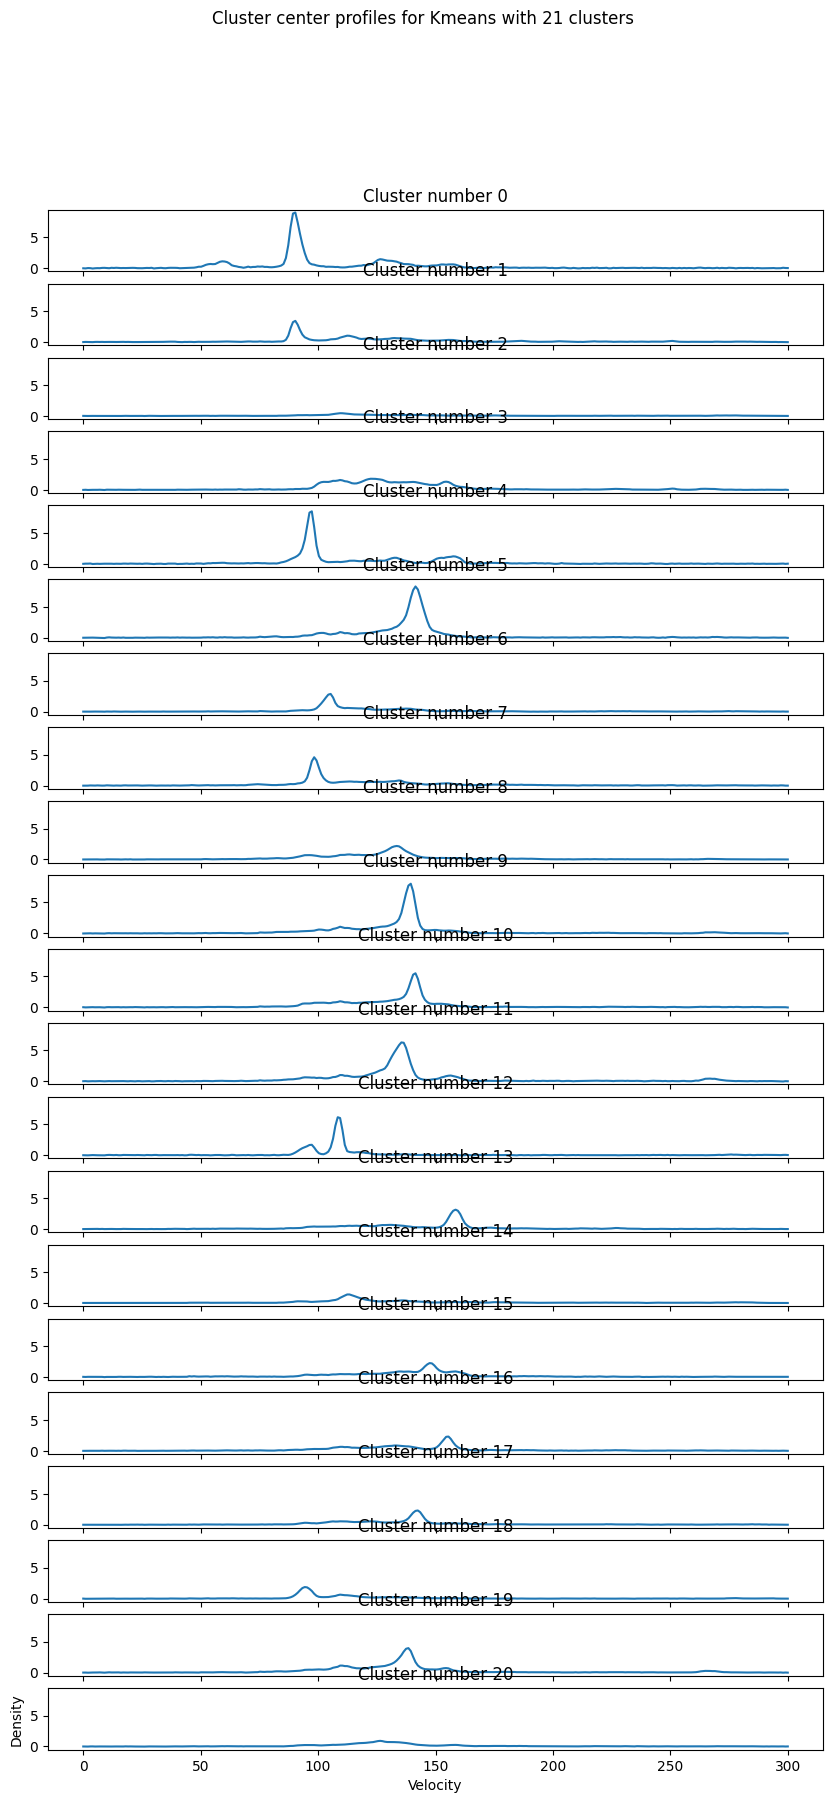

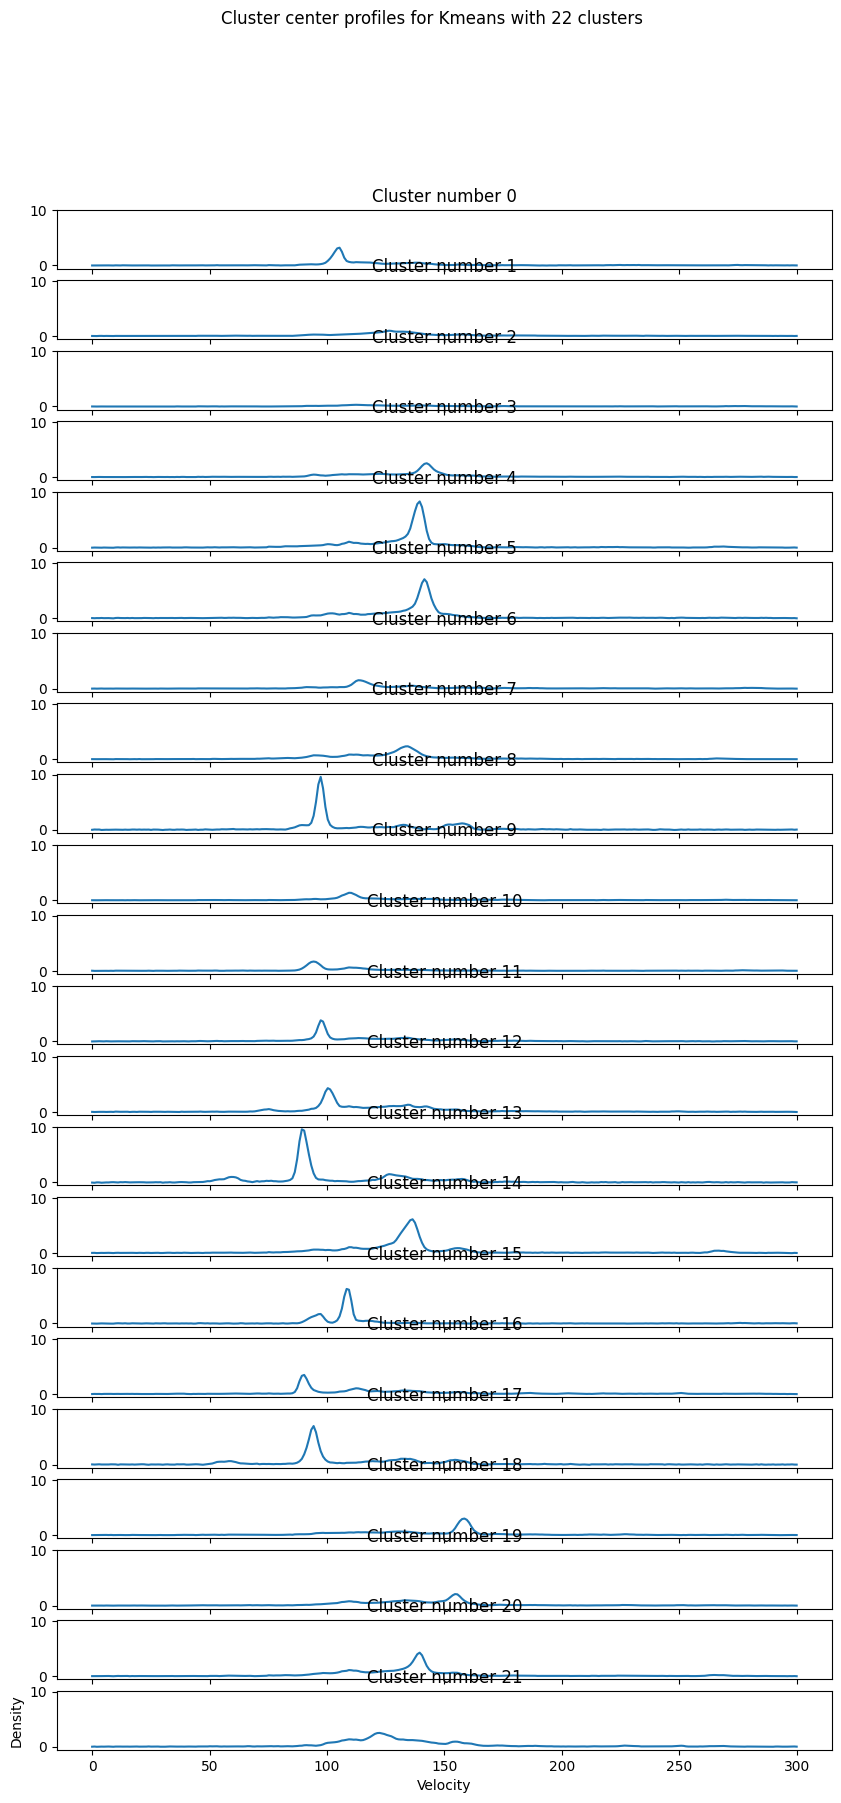

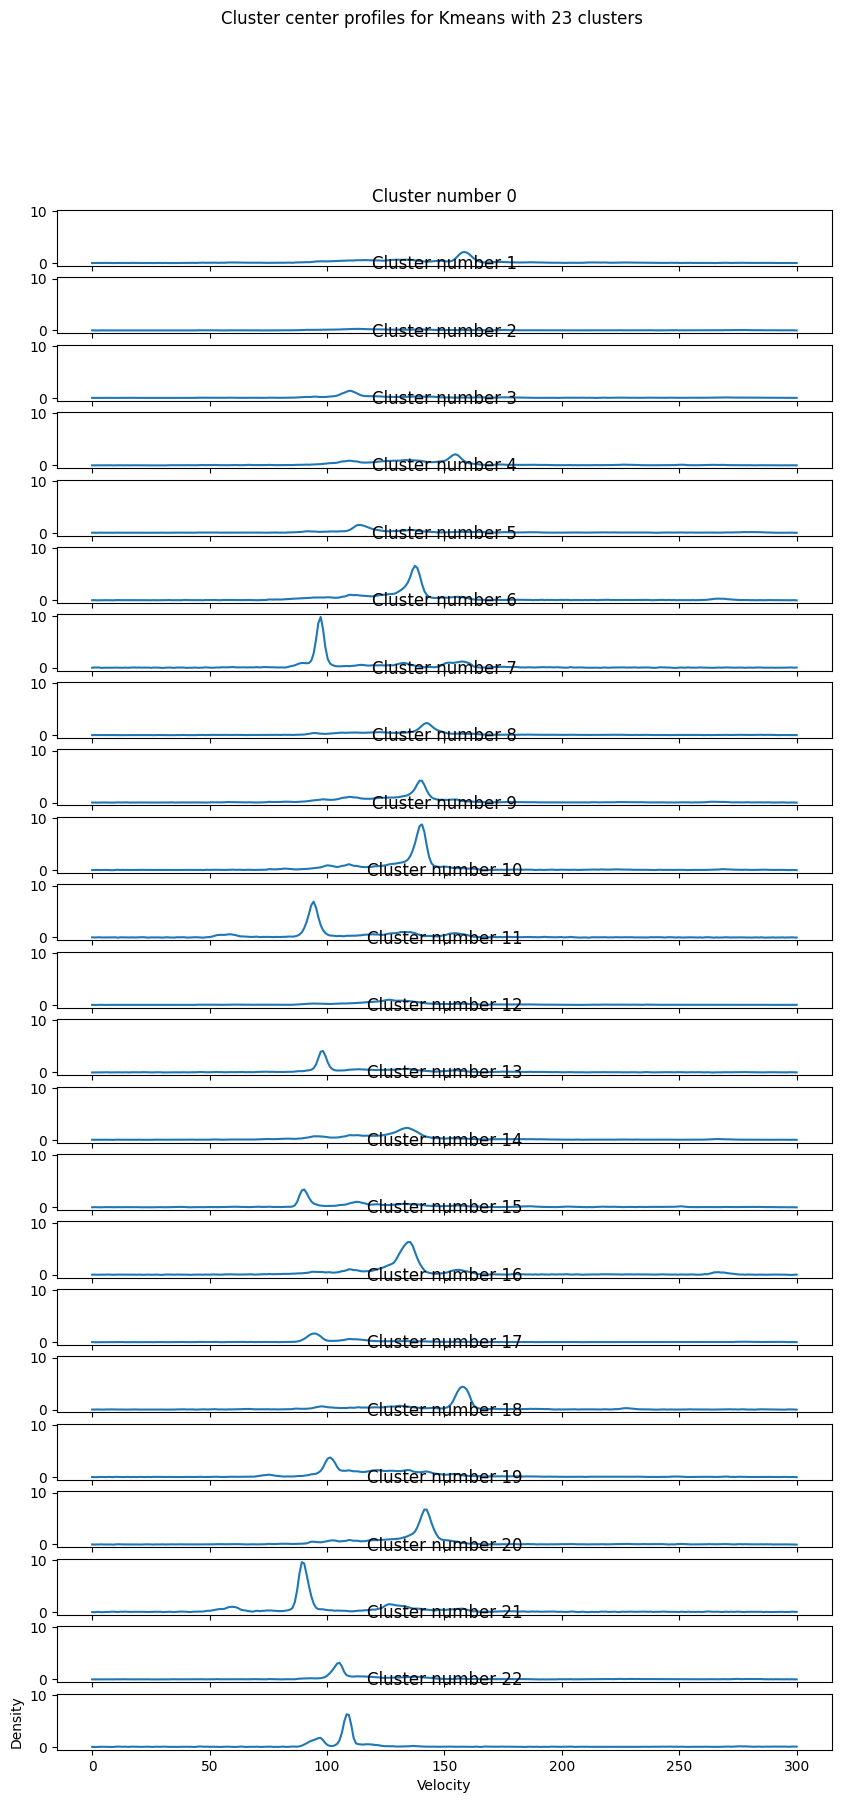

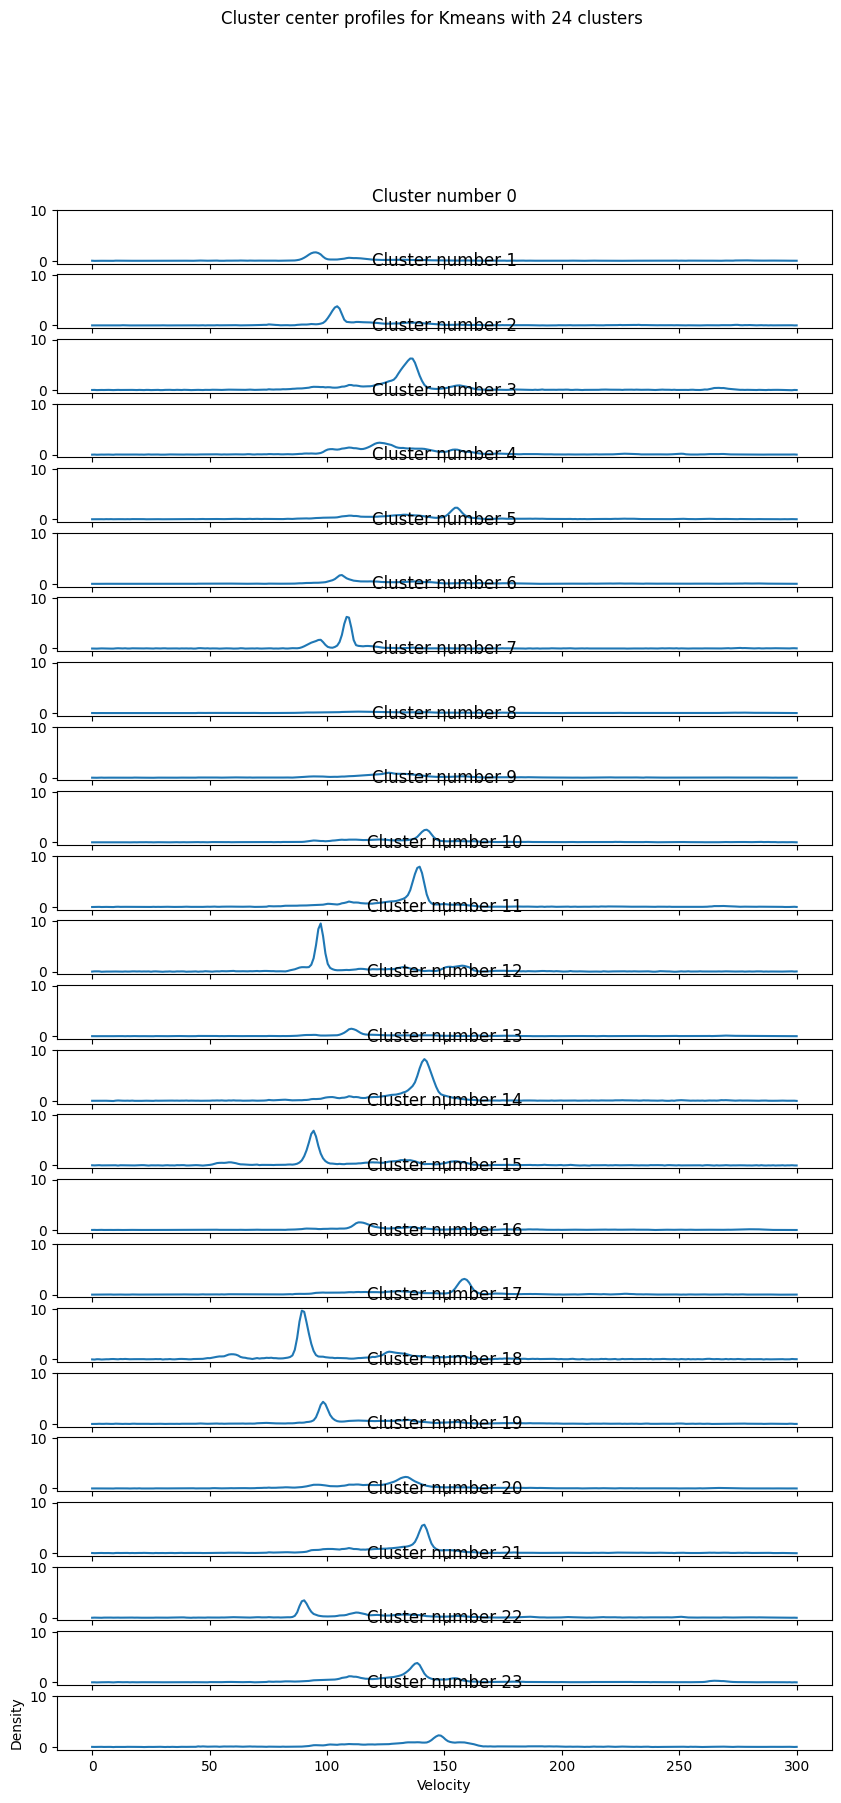

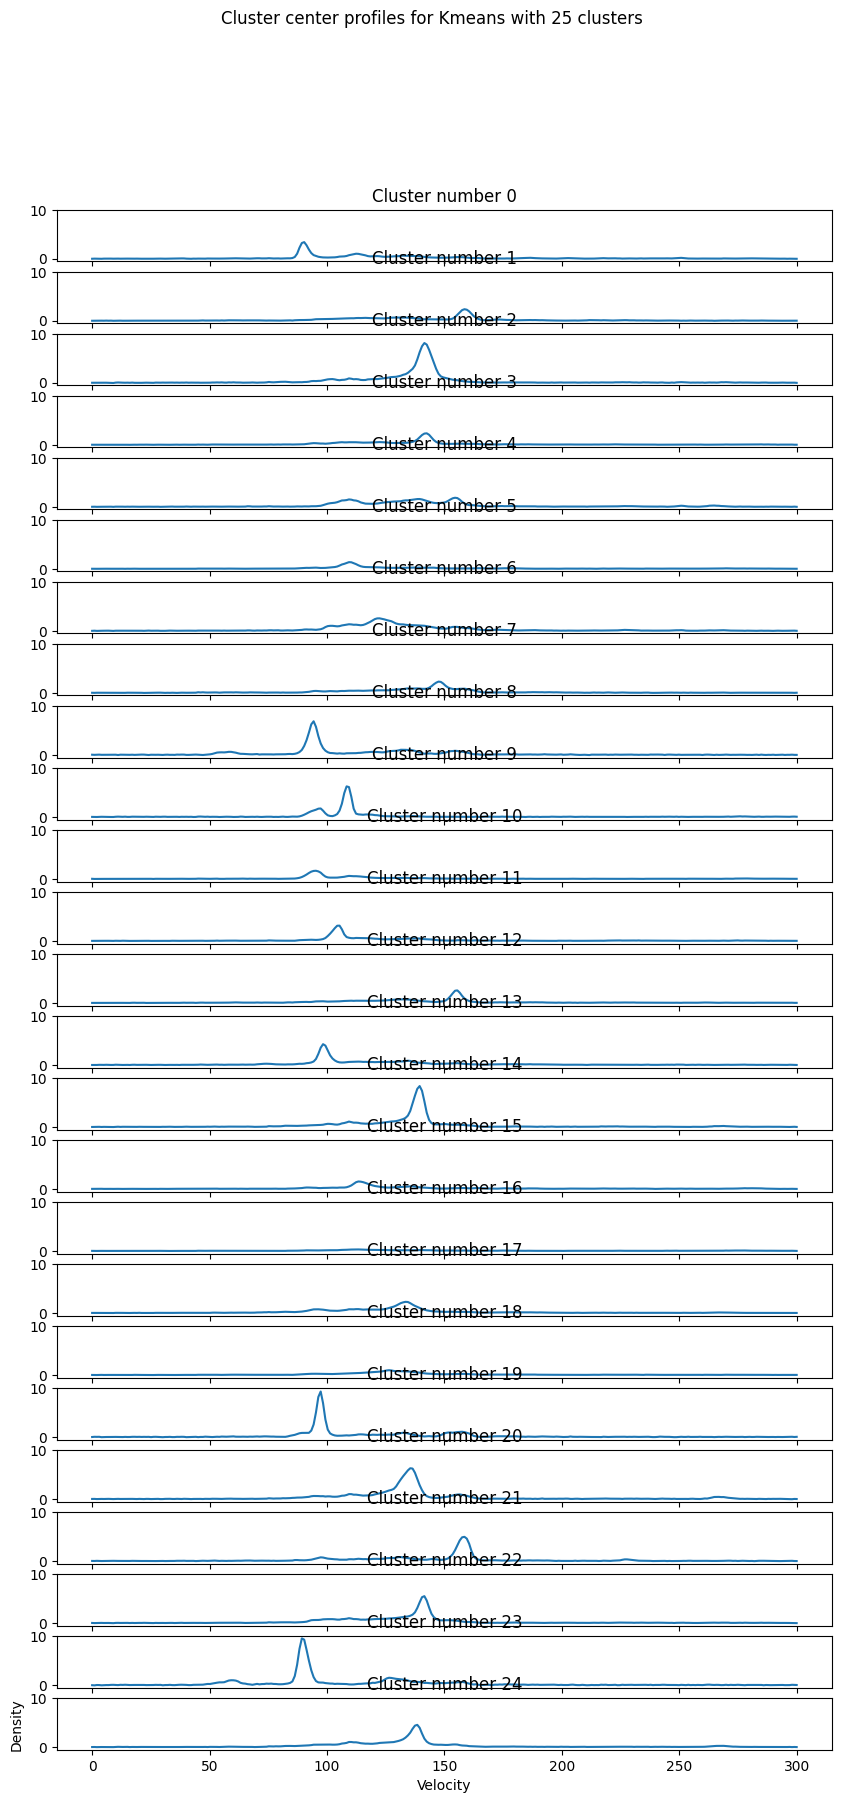

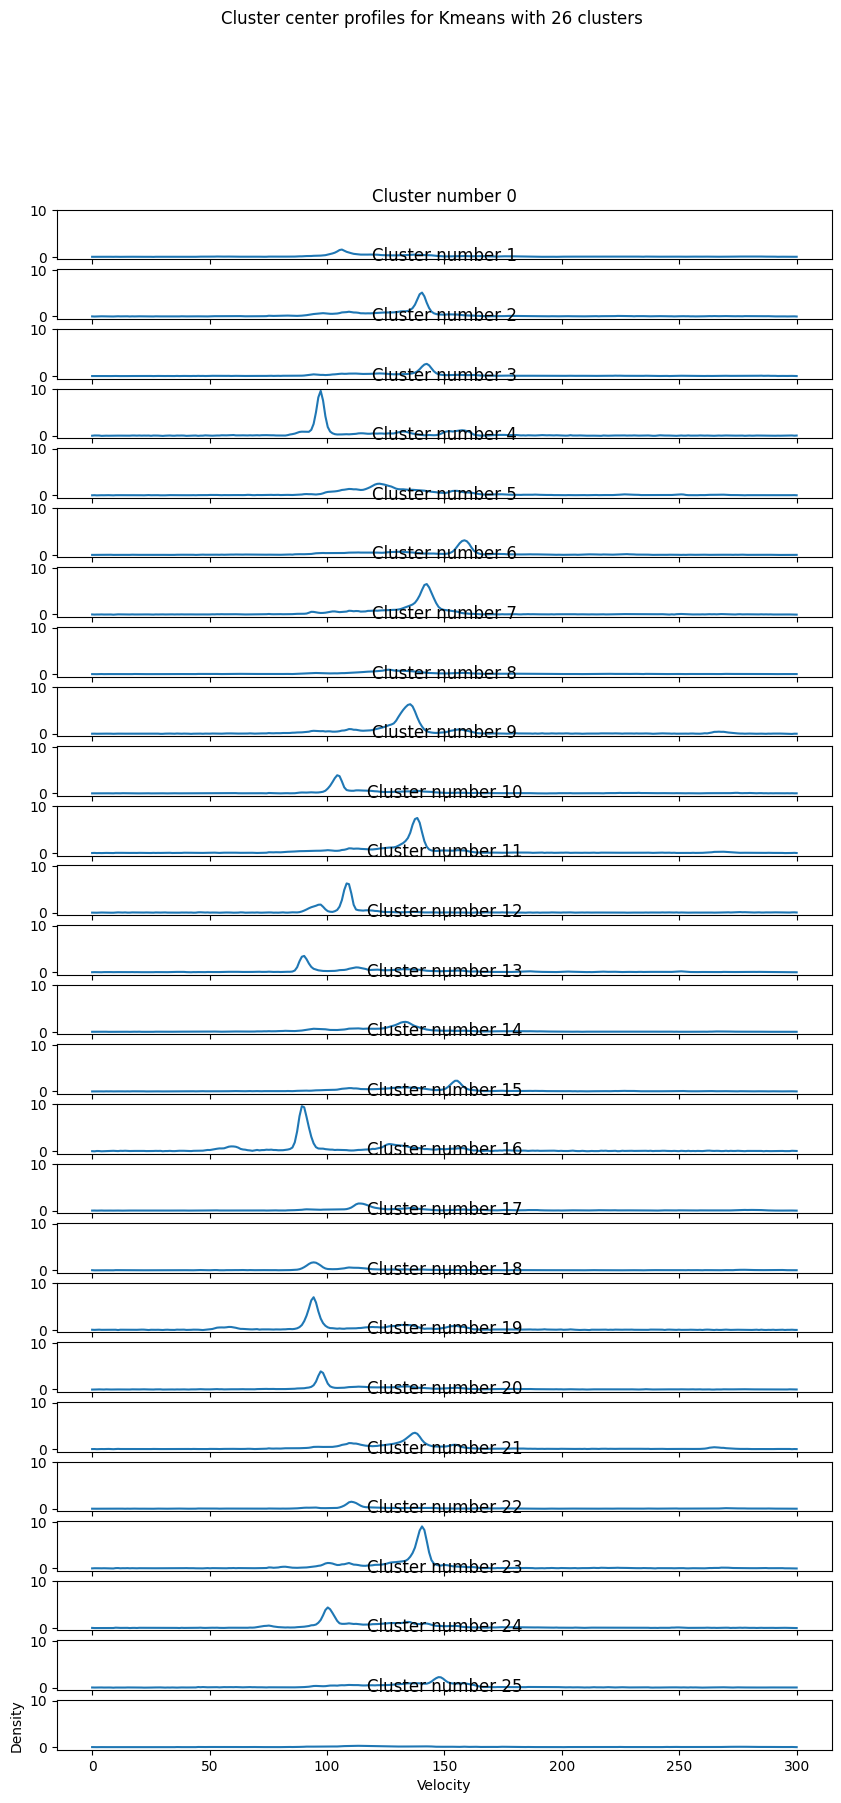

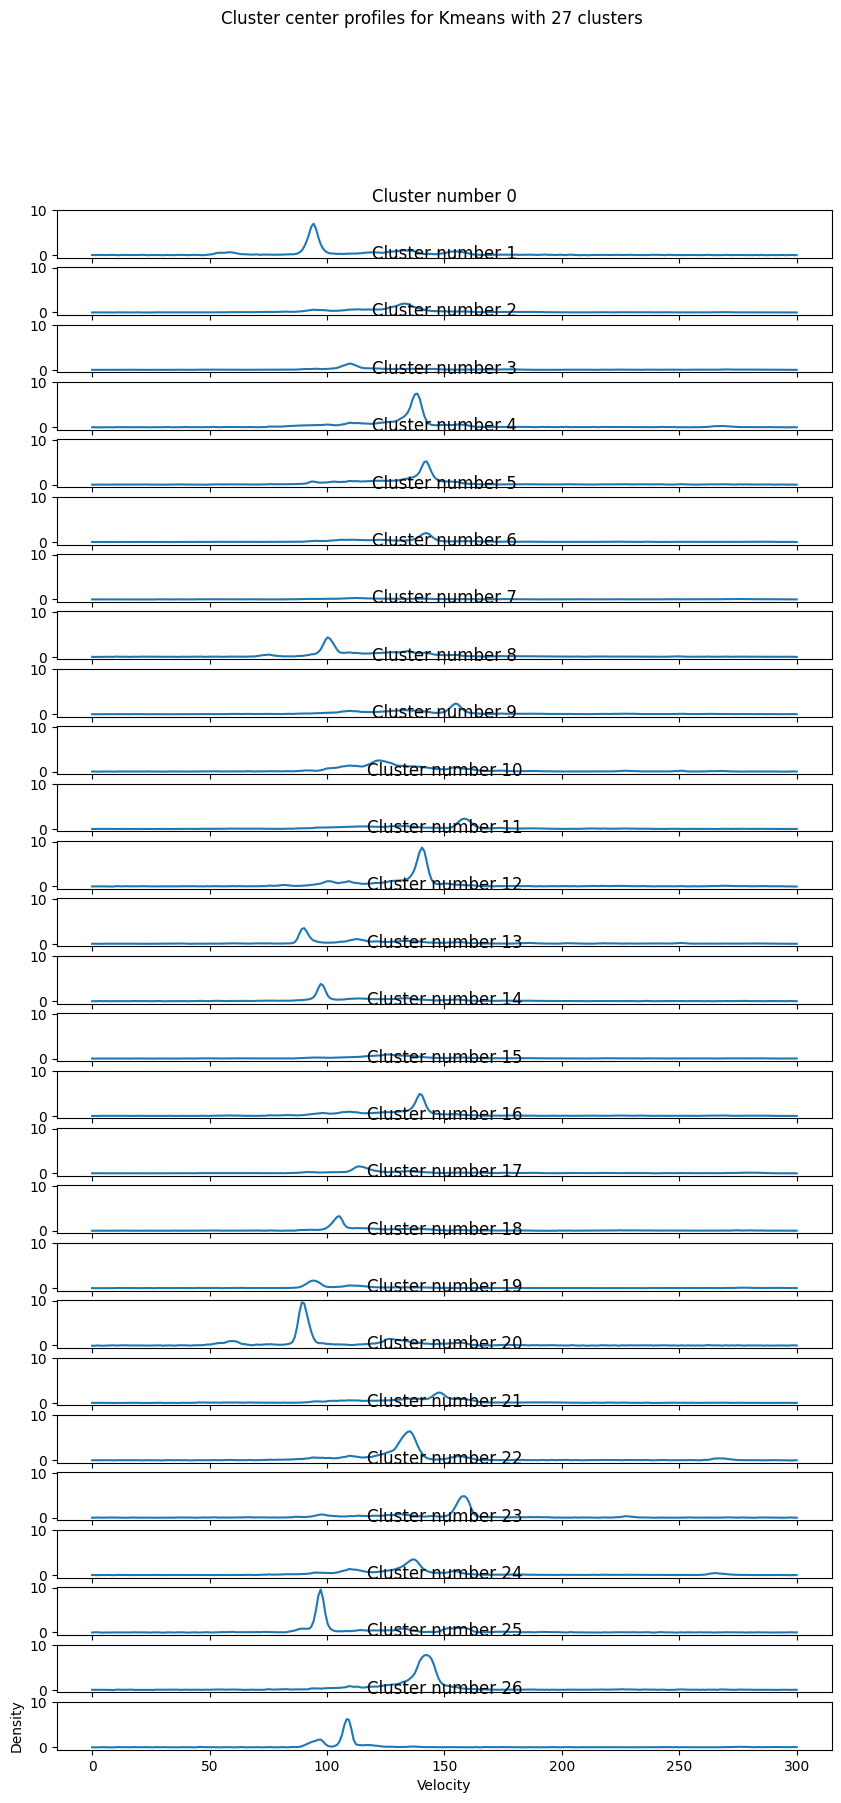

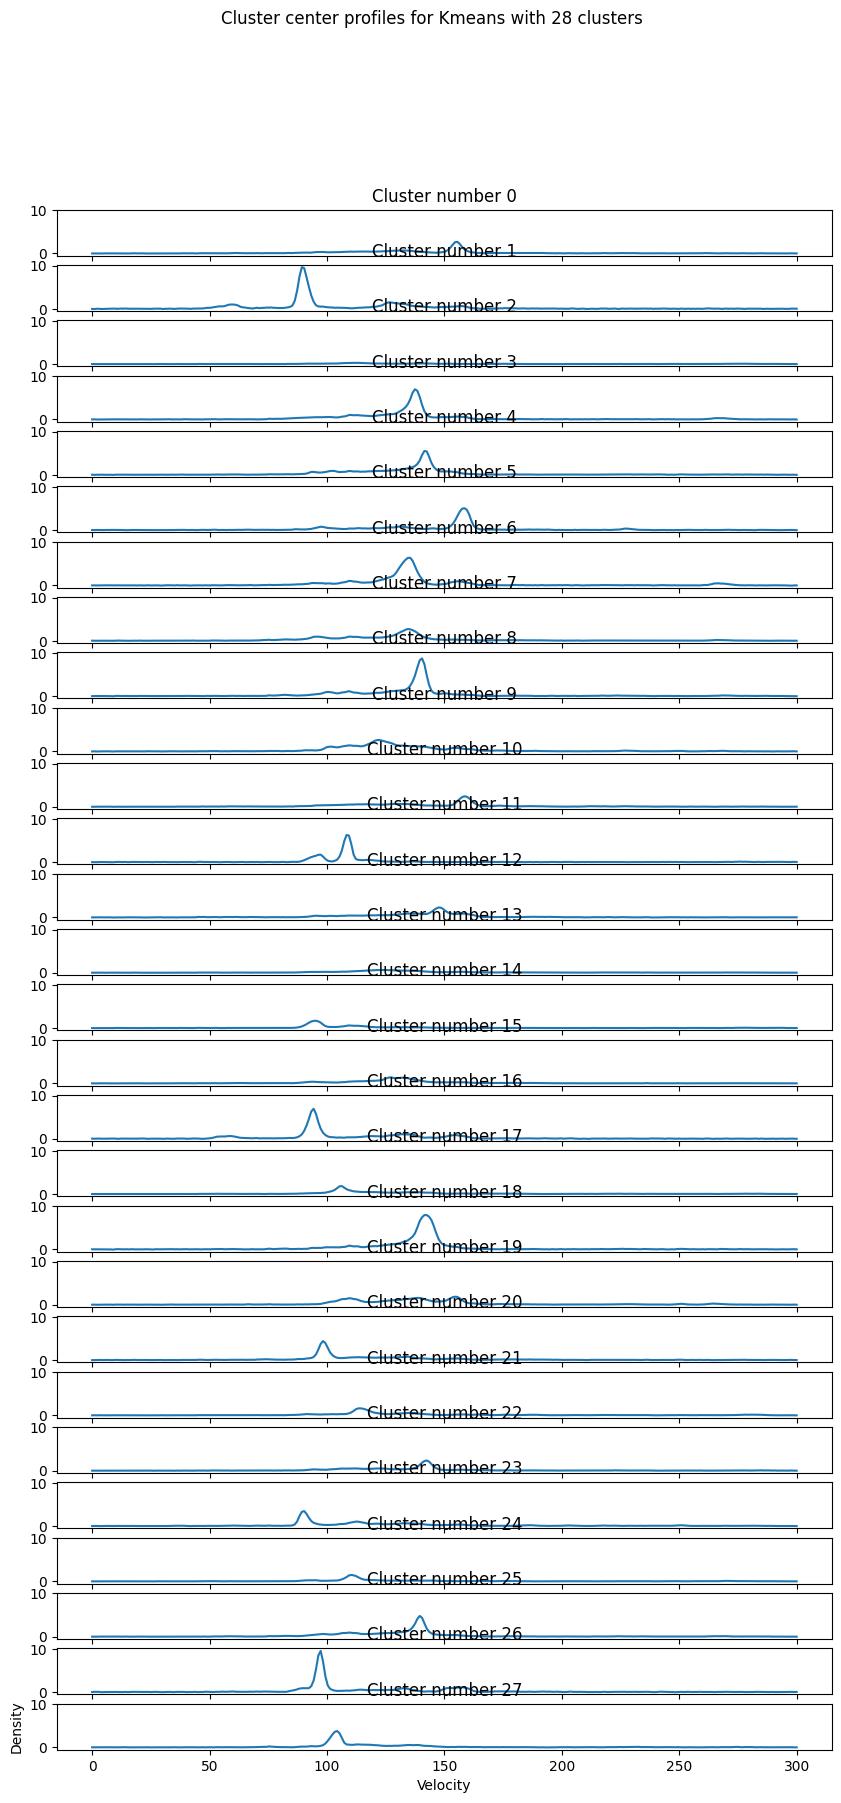

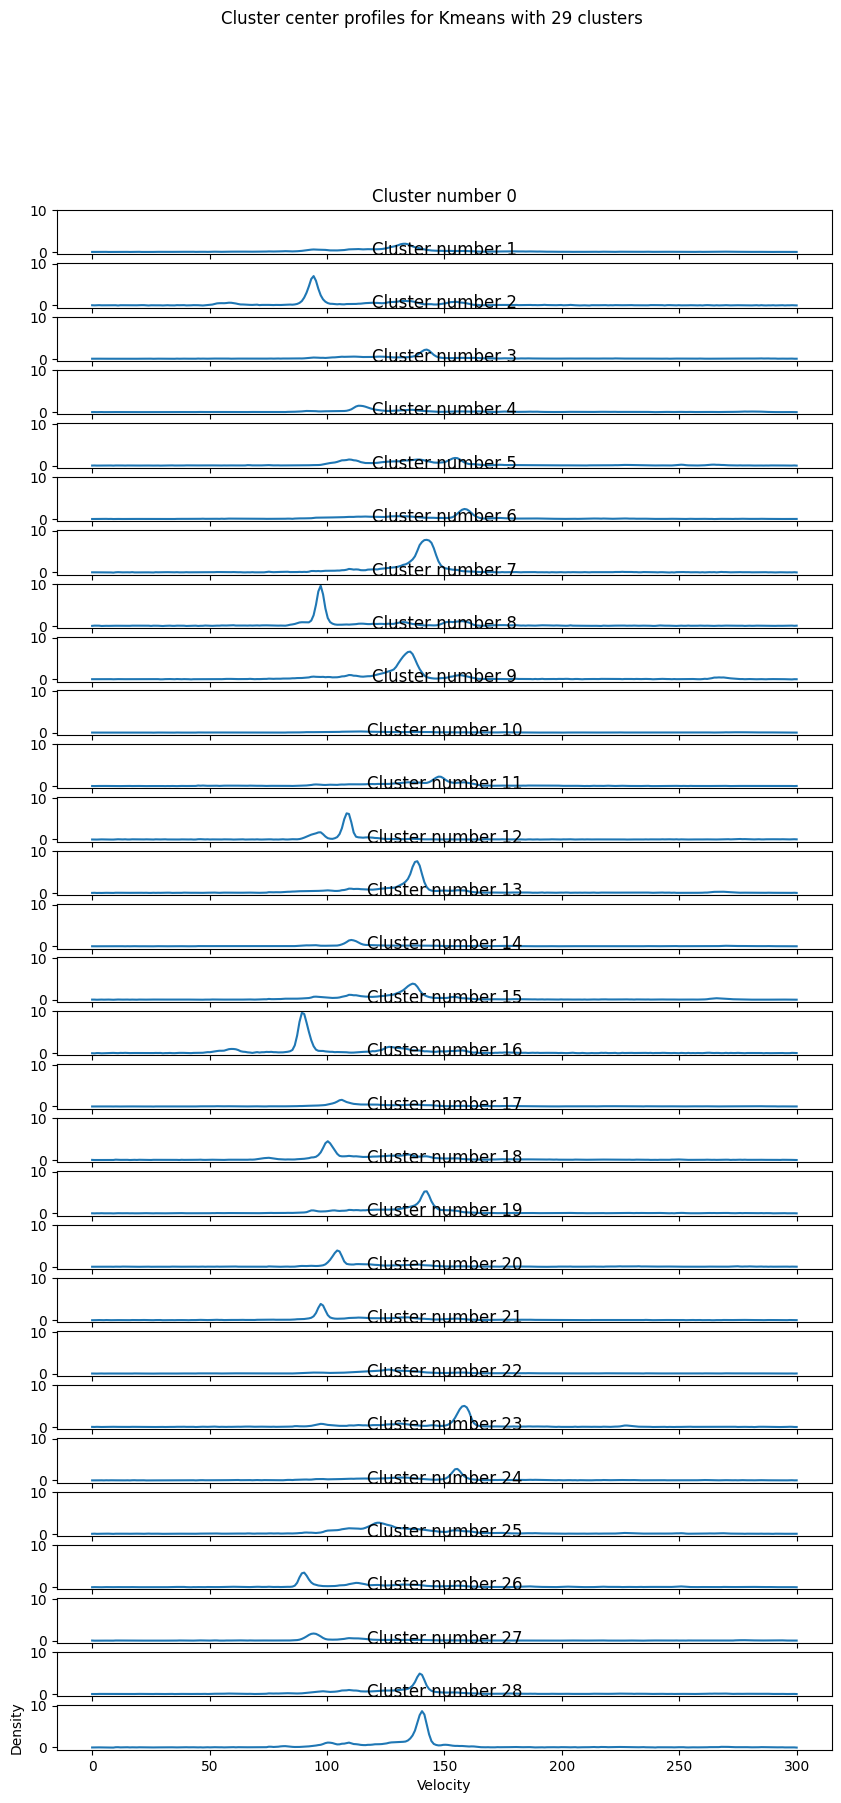

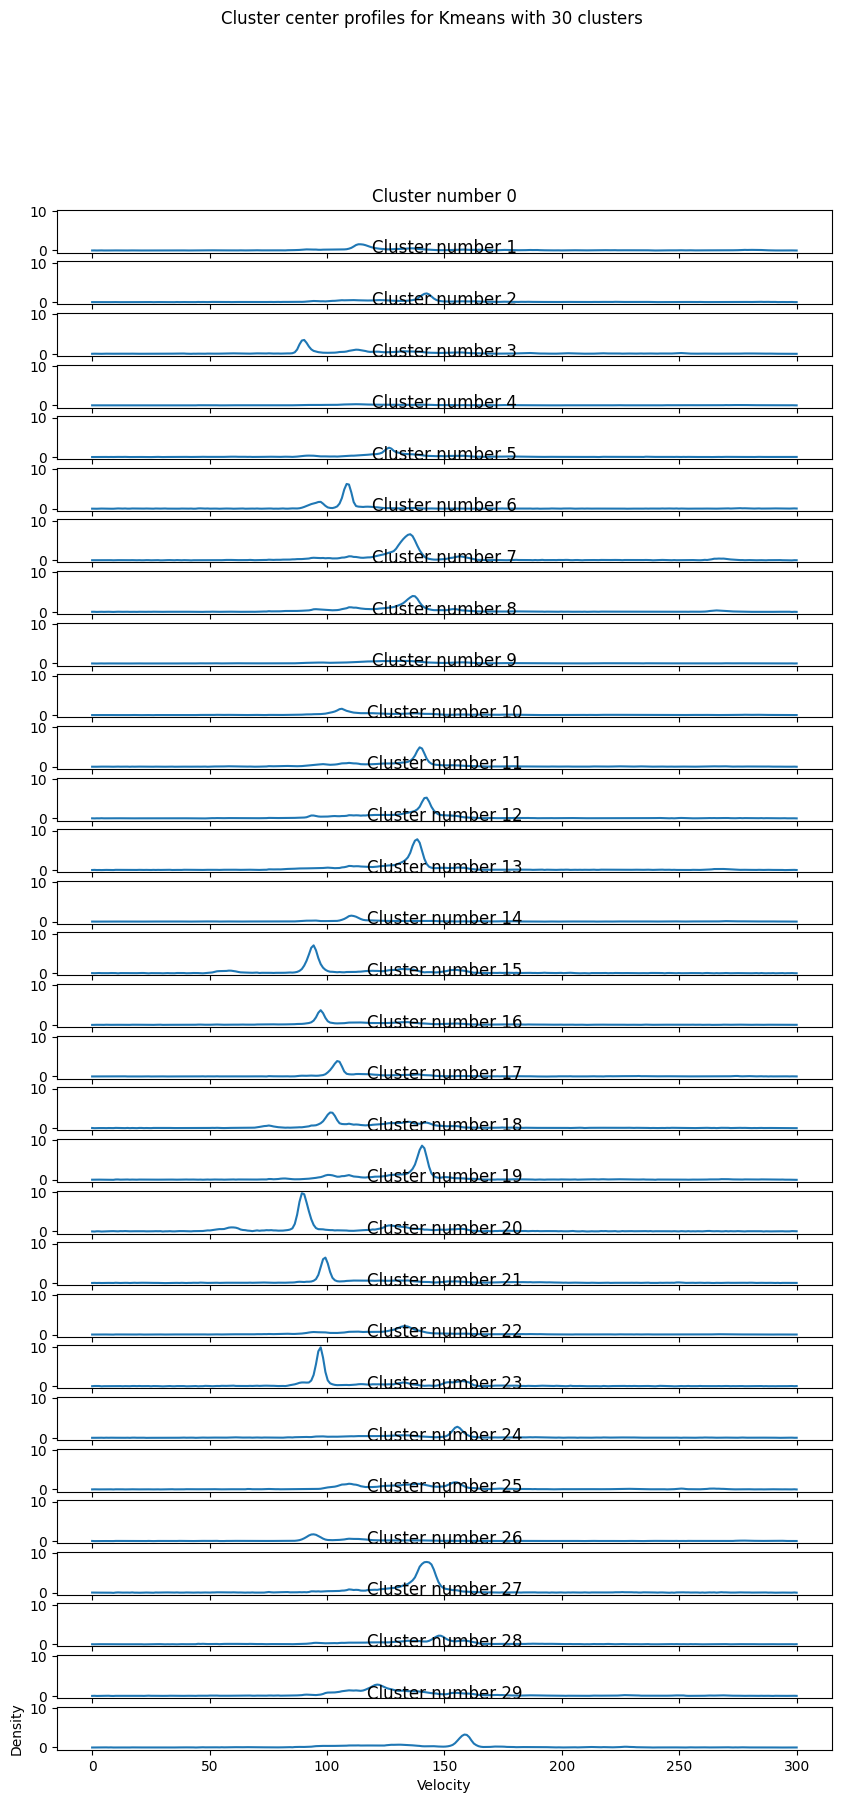

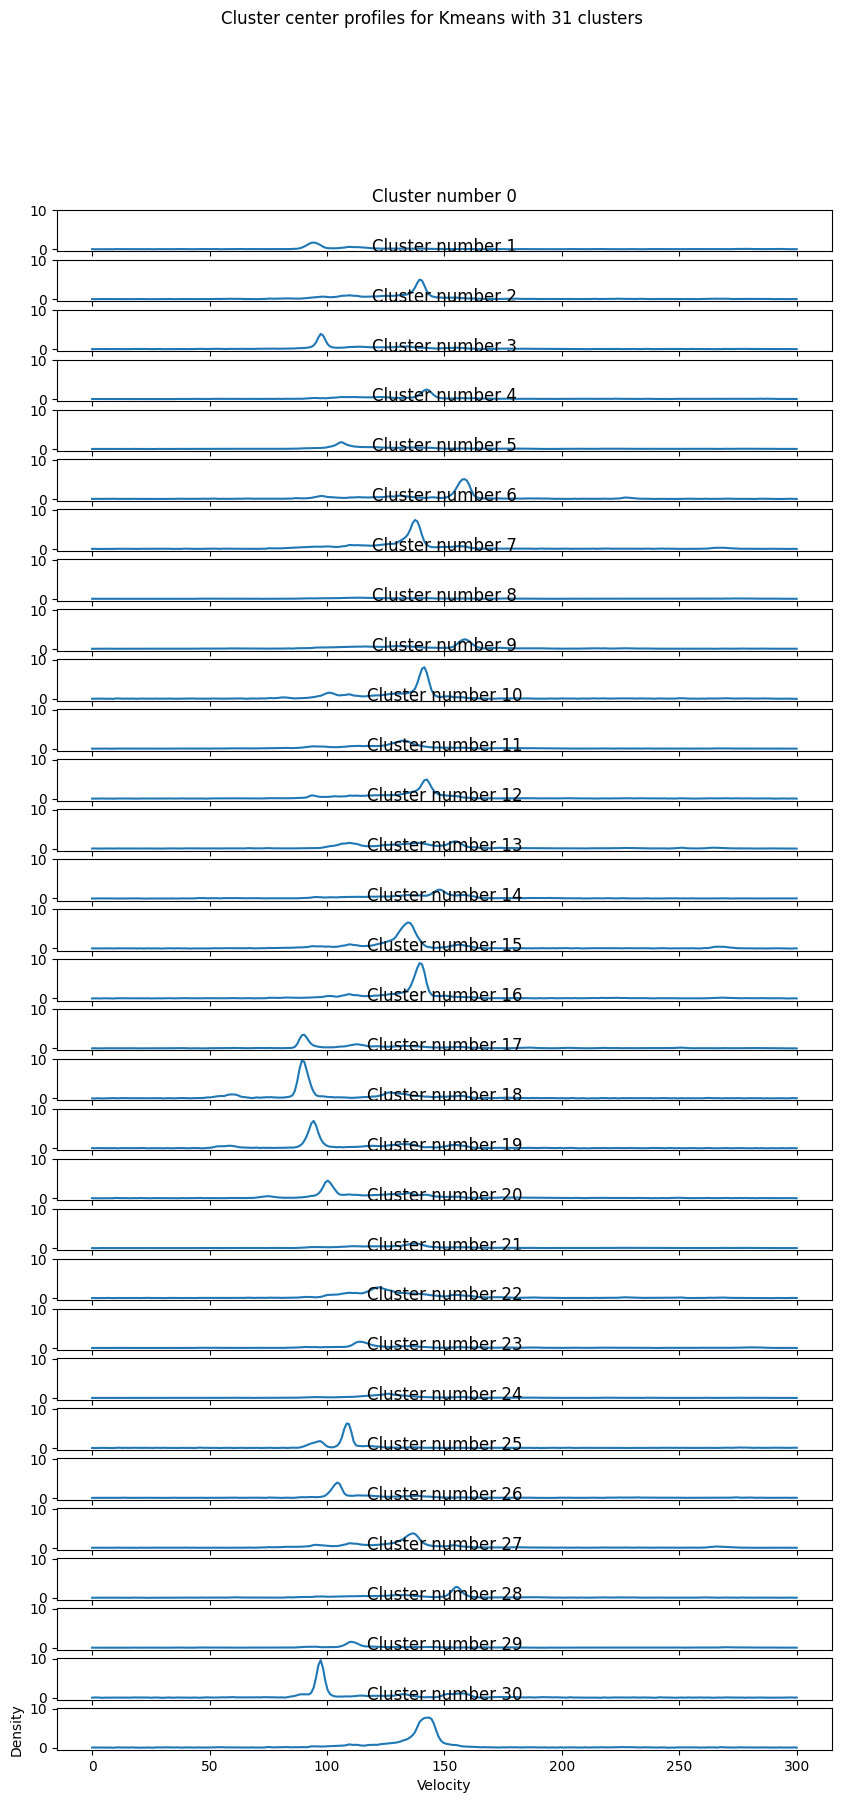

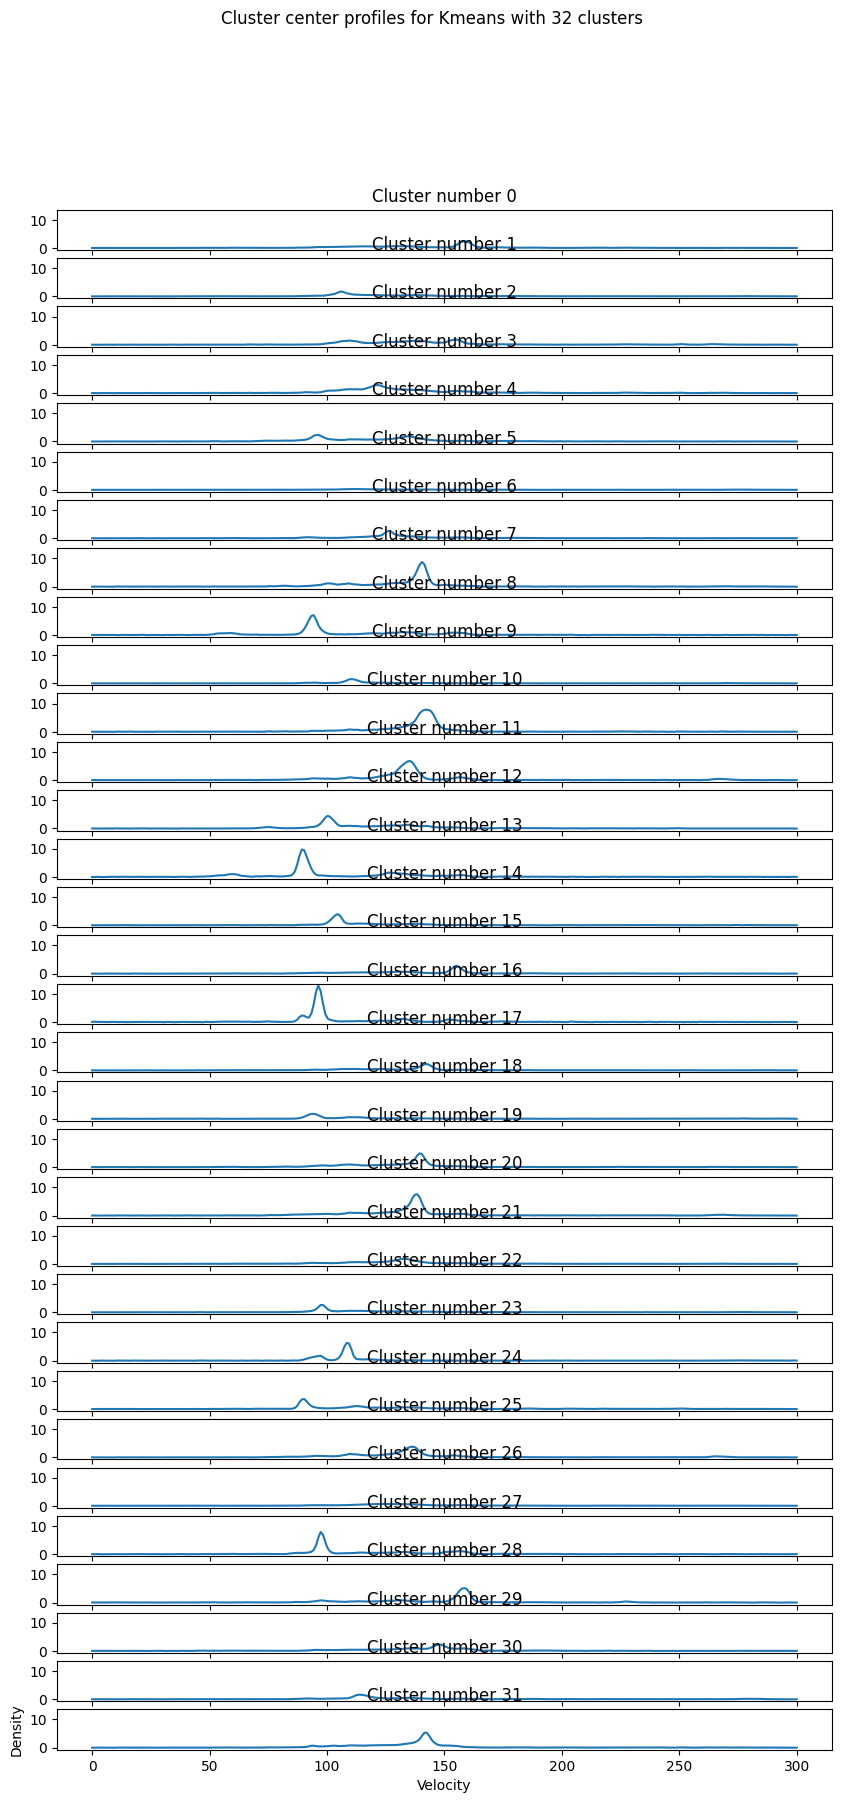

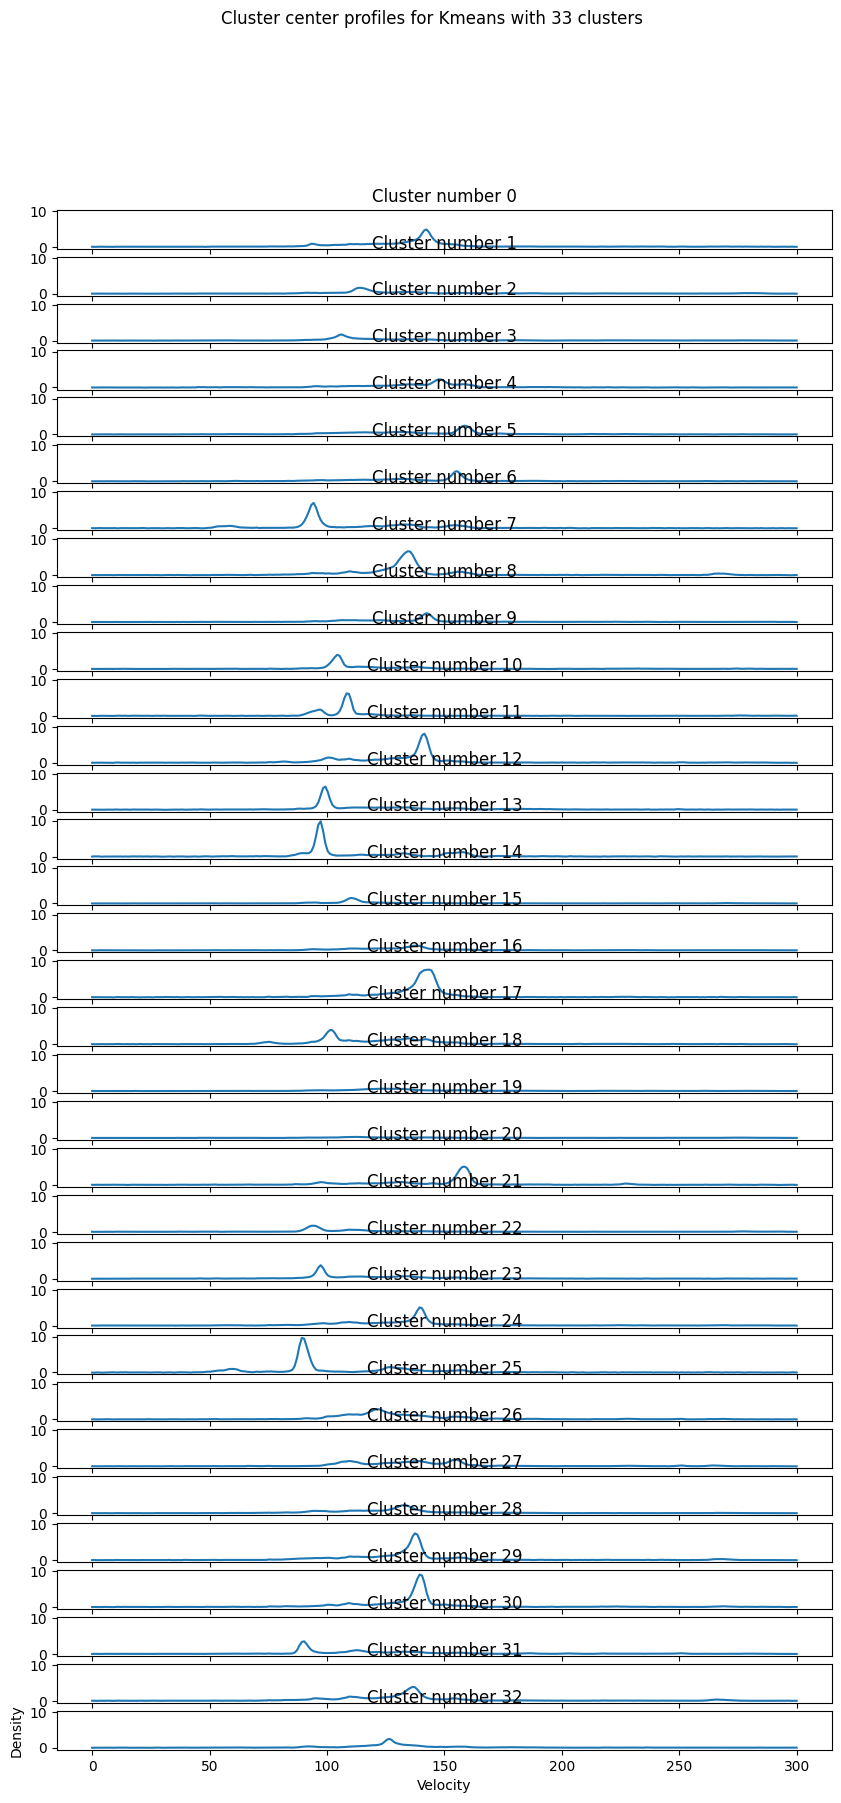

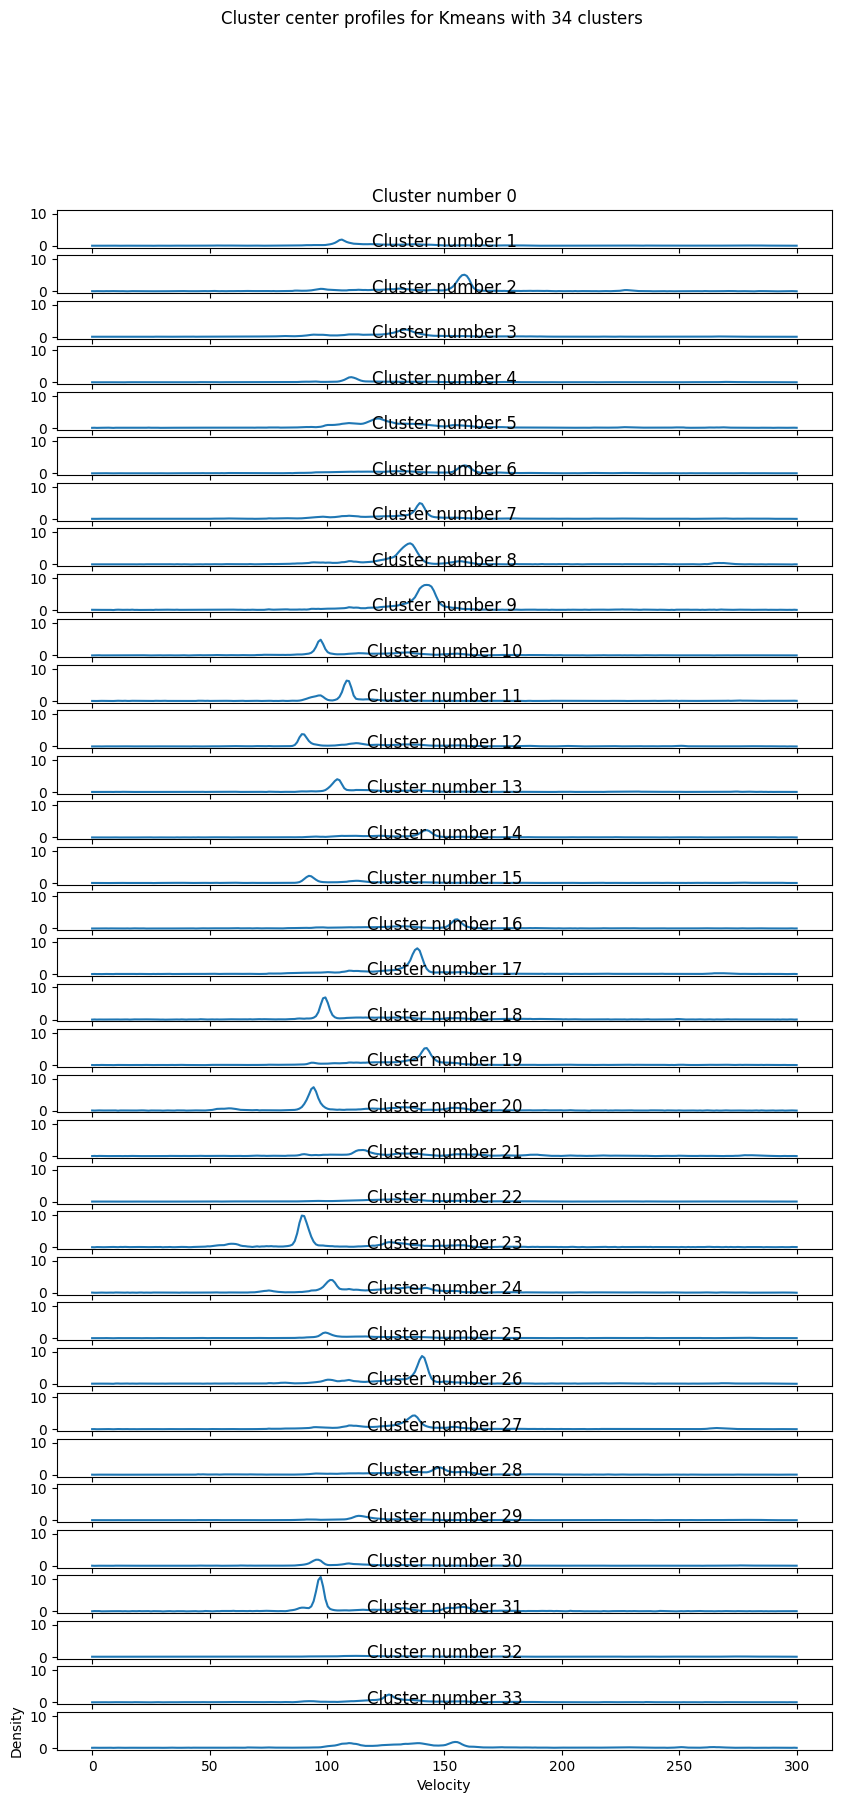

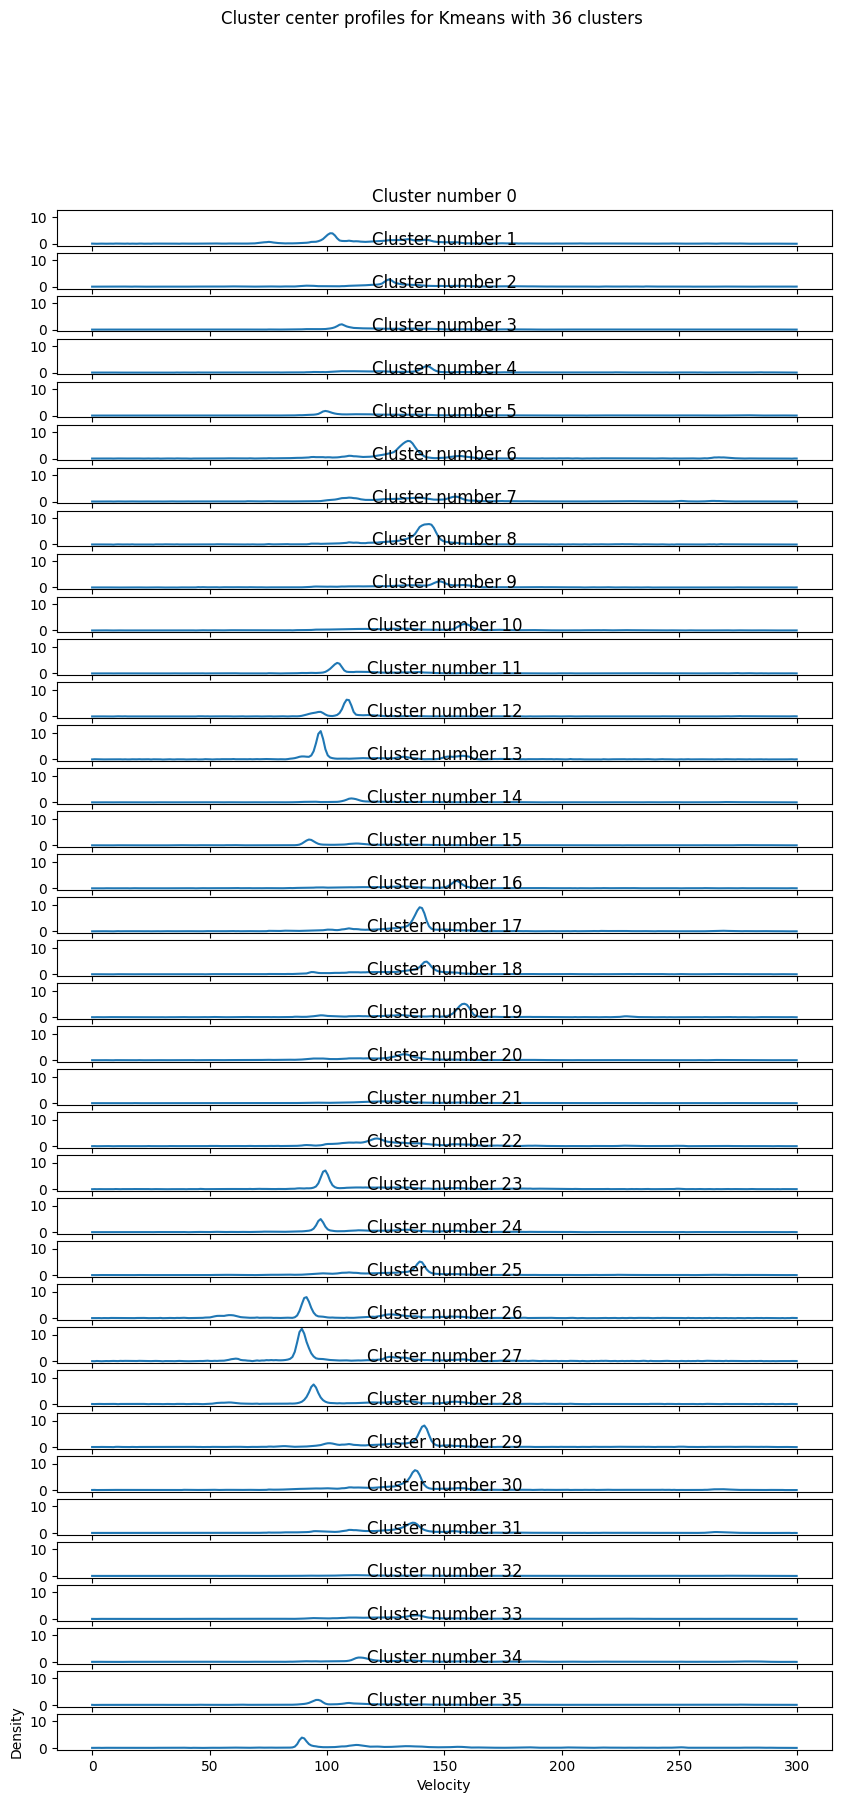

In [4]:
cluster_centers = [kmean.cluster_centers_ for kmean in kmeans_list]
velocity = np.linspace(0, len(cluster_centers[0][0]), len(cluster_centers[0][0]))
for clustering_centers in cluster_centers:
    fig, axs = plt.subplots(len(clustering_centers), sharey=True, sharex=True, figsize=(10, 20))
    plt.ylabel("Density")
    plt.xlabel("Velocity")
    fig.suptitle(f'Cluster center profiles for Kmeans with {len(clustering_centers)} clusters')
    for i in range(len(clustering_centers)):
        axs[i].plot(velocity, clustering_centers[i])
        axs[i].set_title(f"Cluster number {i}")
    plt.show()

In [1]:
i = 2
print("Calinski Harabasz score, the higher, the better")
print("Davies Douldin score, the lower, the better with 0 as minimum")
for kmean in kmeans_list:
    print(f"{i} clusters:")
    print("Calinski Harabasz score: ", calinski_harabasz_score(transformed_data, kmean.labels_))
    print("Davies Douldin score: ", davies_bouldin_score(transformed_data, kmean.labels_))
    # print("Silhouette score: ", silhouette_score(transformed_data, kmean.labels_))
    print("-"*30)
    i += 1

Calinski Harabasz score, the higher, the better
Davies Douldin score, the lower, the better with 0 as minimum


NameError: name 'kmeans_list' is not defined

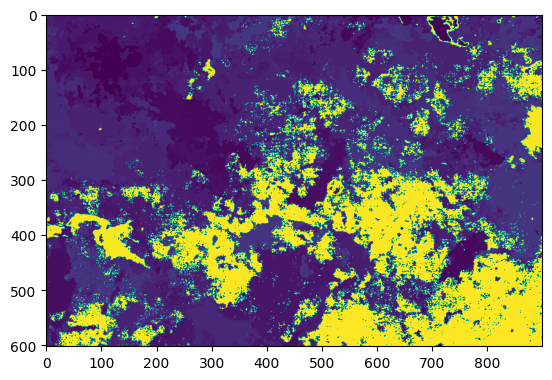

In [27]:
cluster_image = fits.getdata("/home/loris/PhD/Dev/Code/data_exploration/data/SEDIGISM/16/COHRS_15p50-16p50_2D_19_300_plans_clusters.fits")
cluster_header = fits.getheader("/home/loris/PhD/Dev/Code/data_exploration/data/SEDIGISM/16/COHRS_15p50-16p50_2D_19_300_plans_clusters.fits")
cluster_image[cluster_image == 0] = 100
cluster_image[cluster_image == 1] = 101
plt.imshow(cluster_image)

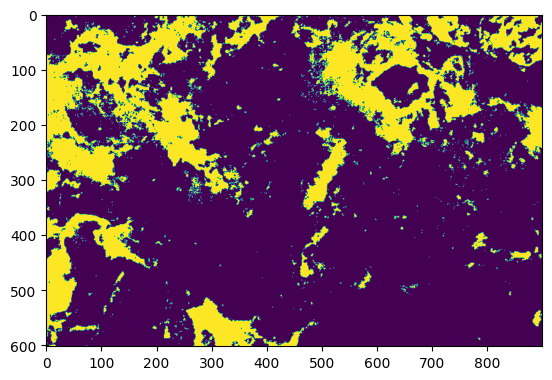

In [28]:
filament_clusters = [2, 6, 3, 100, 5, 7, 13, 14, 15, 16, 18]
background_clusters = [101, 4, 8, 9, 10, 11, 12, 17]
cluster_image[13 : 13 + 217, 463 : 463 + 307][cluster_image[13 : 13 + 217, 463 : 463 + 307] == 11] = 1
for cluster in filament_clusters:
    cluster_image[cluster_image == cluster] = 1
for cluster in background_clusters:
    cluster_image[cluster_image == cluster] = 0
plt.imshow(cluster_image)
fits.writeto("/home/loris/PhD/Dev/Code/data_exploration/data/SEDIGISM/16/COHRS_15p50-16p50_2D_19_300_plans_clusters_binarized.fits", data=cluster_image, header=cluster_header, overwrite=True)

# Heat map: Max

In [2]:
files_dir = "/home/loris/PhD/Dev/Datasets/COHRS/RELEASE2_CUBE_REBIN/"
files = utils.get_sorted_file_list(files_dir)
headers_files = utils.get_sorted_file_list("/home/loris/PhD/Dev/Datasets/COHRS/RELEASE2_INTEG/")
headers = [fits.getheader("/home/loris/PhD/Dev/Datasets/COHRS/RELEASE2_INTEG/" + header) for header in headers_files]
for i in range(len(files)):
    input_hdr = fits.open(files_dir + files[i])
    input_data = input_hdr[0].data
    header = input_hdr[0].header
    # max_map = np.argmax(input_data, axis=0)
    max_map = np.max(input_data, axis=0)
    fits.writeto("/home/loris/PhD/Dev/Datasets/COHRS/Max_maps/" + "max_map_" + files[i], data=max_map, header=headers[i], overwrite=True)

In [16]:
files = "/home/loris/PhD/Dev/Code/data_exploration/data/SEDIGISM/16/COHRS_15p50-16p50_3D.fits"
header = fits.getheader("/home/loris/PhD/Dev/Code/data_exploration/data/SEDIGISM/16/COHRS_15p50-16p50_2D.fits")
data = np.squeeze(fits.getdata(files))
# max_map = np.argmax(input_data, axis=0)
max_map = np.max(data, axis=0)
fits.writeto("/home/loris/PhD/Dev/Code/data_exploration/data/SEDIGISM/16/COHRS_15p50-16p50_max.fits", data=max_map, header=header, overwrite=True)

In [ ]:
km = TimeSeriesKMeans(n_clusters=3, metric="dtw")
labels = km.fit_predict(data)

In [51]:
merged = fits.getdata("../../../Datasets/nh2_dataset/merged/merge_result.fits")
mosaic = fits.getdata("../../../Datasets/nh2_dataset/mosaic/normed_images/nh2C_mosaic358000-Multi_Scale_Local_Stretch_constant.fits")
header = fits.getheader("../../../Datasets/nh2_dataset/merged/merge_result.fits")

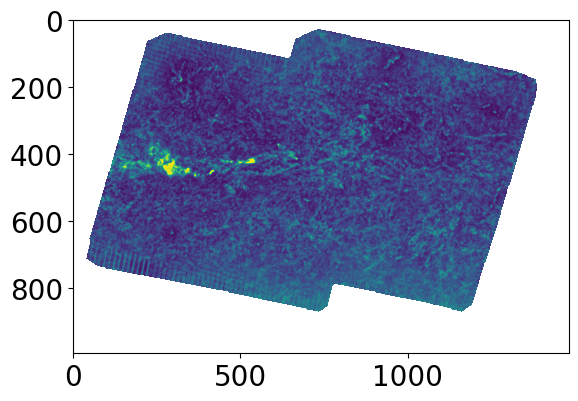

In [52]:
plt.imshow(mosaic)

In [53]:
tmp_1 = merged[1019 + 995 - 644 - 995: 1019 + 995 - 644,  1342 + 1482 - 1185 -1482 : 1342 + 1482 - 1185]
tmp_1[np.isnan(tmp_1)] = -1
tmp_2 = mosaic.copy()
tmp_2[np.isnan(tmp_2)] = -1
tmp_3 = np.maximum(tmp_1,tmp_2)
tmp_3[tmp_3 == -1] = np.nan

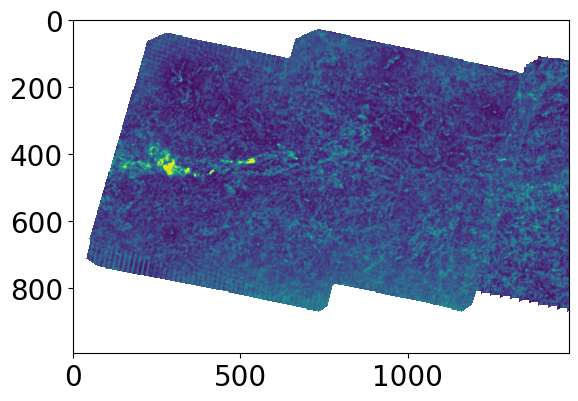

In [54]:
plt.imshow(tmp_3)

In [55]:
merged[1019 + 995 - 644 - 995: 1019 + 995 - 644,  1342 + 1482 - 1185 -1482 : 1342 + 1482 - 1185] = tmp_3

In [56]:
fits.writeto("../../../Datasets/nh2_dataset/merged/normed_density_merged.fits", data=merged, header=header, overwrite=True)